# A simple crib sheet for loading and plotting Arase satellite and ground-based observation data
(latest updated: Sep., 2024)

This notebook shows how to load and plot Arase satellite data with pySPEDAS and pyTplot.

Please refer to the following website for the details of the data.

https://ergsc.isee.nagoya-u.ac.jp/data_info/erg.shtml.en

## Get started
If you are using the Google Colaboratory and have not had the PySPEDAS module installed, please run the following `!pip install pyspedas` command to get it ready. If you run your own Python session on your local PC, you have to install the PySPEDAS module beforehand, with the same `pip` command (without "!").

The second `pip` command with a github URL is to install the bleeding-edge distribution of the ERG submodule developed by ERG-SC. This distribution always delivers the latest development version of only the ERG-SC plug-in module for ERG satellite and ground data. The downside, however, is that some modules are in a highly experimental phase and not fully tested, possibly containing unresolved bugs. You should use it at your own risk. Because this module is installed as **ergpyspedas** module, you can load it with `import ergpyspedas`.

If you would like to use the stable distribution of the ERG-SC submodule, you only have to install the official PySPEDAS module using the first `pip` command: PySPEDAS always contains a stable version of the ERG-SC plug-in. So just skip the second one.  

In [7]:
!pip install pyspedas
!pip install --force-reinstall git+https://github.com/ergsc-devel/pyspedas_plugin.git

  Running command git clone --filter=blob:none --quiet https://github.com/ergsc-devel/pyspedas_plugin.git 'C:\Users\shinb\AppData\Local\Temp\pip-req-build-p1j12fxf'
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] アクセスが拒否されました。: 'c:\\users\\shinb\\pyspedas\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp310-win_amd64.pyd'
Check the permission

  Cloning https://github.com/ergsc-devel/pyspedas_plugin.git to c:\users\shinb\appdata\local\temp\pip-req-build-p1j12fxf
  Resolved https://github.com/ergsc-devel/pyspedas_plugin.git to commit 16cad891b3da4dc775bea050675d4c6b321f55e0
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pyspedas-1.6.1-py3-none-any.whl.metadata (14 kB)
  Using cached vtk-9.2.2-cp310-cp310-win_amd64.whl.metadata (5.3 kB)
  Using cached PySide6-6.4.1-cp37-abi3-win_amd64.whl.metadata (5.2 kB)
  Using cached shiboken6-6.4.1-cp37-abi3-win_amd64.whl.metadata (2.3 kB)
  Using cached PySide6_Essentials-6.4.1-cp37-abi3-win_amd64.whl.metadata (3.5 kB)
  Using cached PySide6_Addons-6.4.1-cp37-abi3-win_amd64.whl.metadata (3.8 kB)

The following commands import some necessary modules for loading and plotting the data.

In [2]:
import pyspedas                     # Import a pyspedas tool.
import pytplot                      # Import a pytplot tool.
import ergpyspedas                  # Import an ergpyspedas plugin tool
from pytplot.tplot import tplot     # As a shortcut for pytplot.tplot()

For example, the data-load module for the MGF data can be imported with the following command:

23-Sep-24 13:57:06: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
23-Sep-24 13:57:06: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
printing PI info and rules of the road was failed
0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm


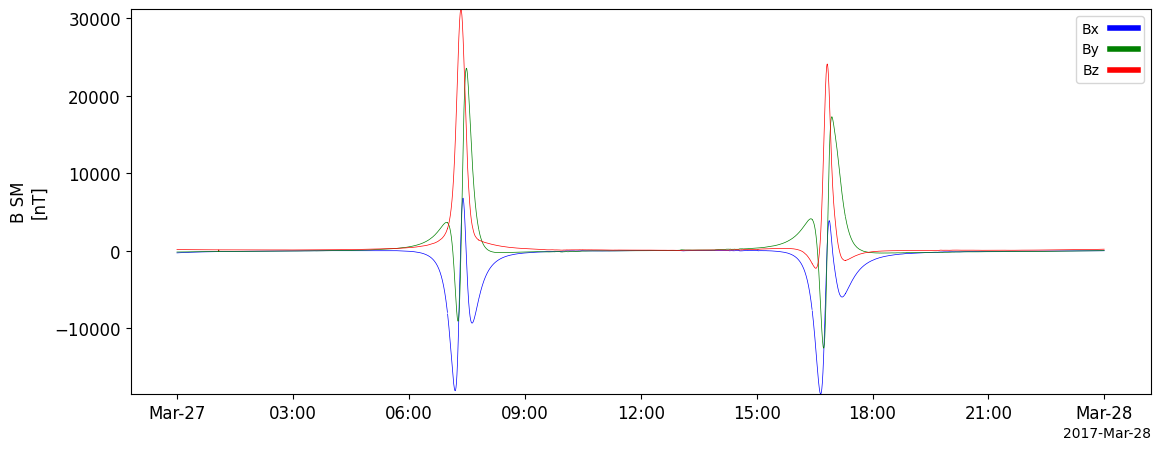

In [3]:
from ergpyspedas.erg import mgf
mgf_var = mgf()                     # Load Arase MGF data.
pytplot.tplot_names()               # Show the list of created tplot variables.
tplot('erg_mgf_l2_mag_8sec_sm')     # Create time-series plot of 8-sec MGF data in SM coordinates

------------------
# Beginner course
------------------
## 1. Data analysis with basic commands of pyTplot and pySPEDAS
With MGF data, let us introduce some basic commands of pyTplot and pySPEDAS, which are used commonly for loading and visualizing data. Also see the official document of the pyTplot module at:

https://pytplot.readthedocs.io/en/latest/index.html

### 1.1 Load Arase MGF data and plot them with "tplot"

12-Sep-24 13:45:52: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2024/05/
12-Sep-24 13:45:53: File is current: erg_data/satellite/erg/mgf/l2/8sec/2024/05/erg_mgf_l2_8sec_20240510_v04.04.cdf
12-Sep-24 13:45:53: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmp4245wvwc.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 13:45:53: File is current: erg_data/satellite/erg/mgf/l2/8sec/2024/05/erg_mgf_l2_8sec_20240511_v04.04.cdf
12-Sep-24 13:45:53: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpjjq5mmxh.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 13:45:53: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceW

 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
Affiliation:  ['Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


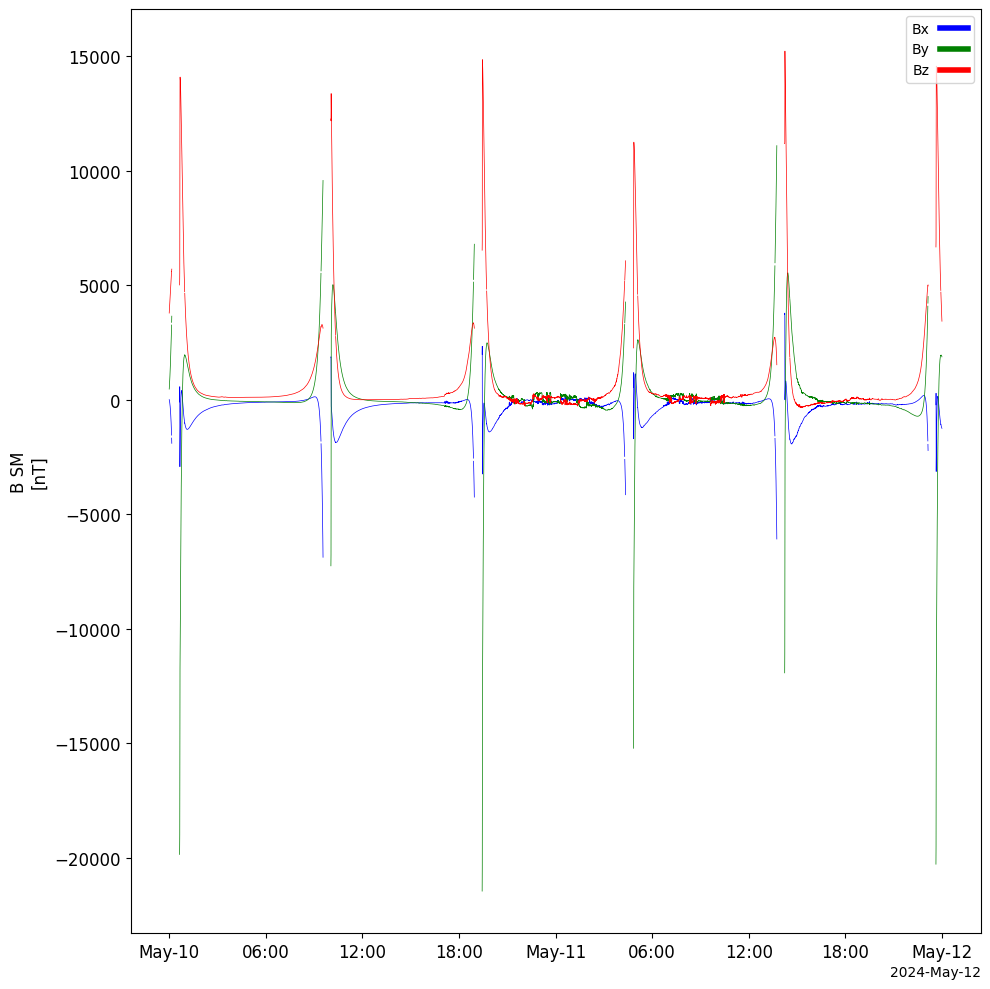

In [4]:
from pyspedas.erg import mgf
tr=['2024-05-10', '2024-05-12']                                            # Set time range to load MGF data.
ID = '********'                                                         # Set ID for downloading Arase data.
pw = '********'                                                            # Set password for downloading Arase data.
vars = mgf( trange=tr, uname = ID, passwd = pw )                           # load MGF Lv.2 8-s data for 10-12 May, 2024.
tplot('erg_mgf_l2_mag_8sec_sm', xsize = 10, ysize = 12 )                   # Plot MGF Lv.2 8-s data.

### 1.2 Plot multiple tplot variables verticaly in a row on a window

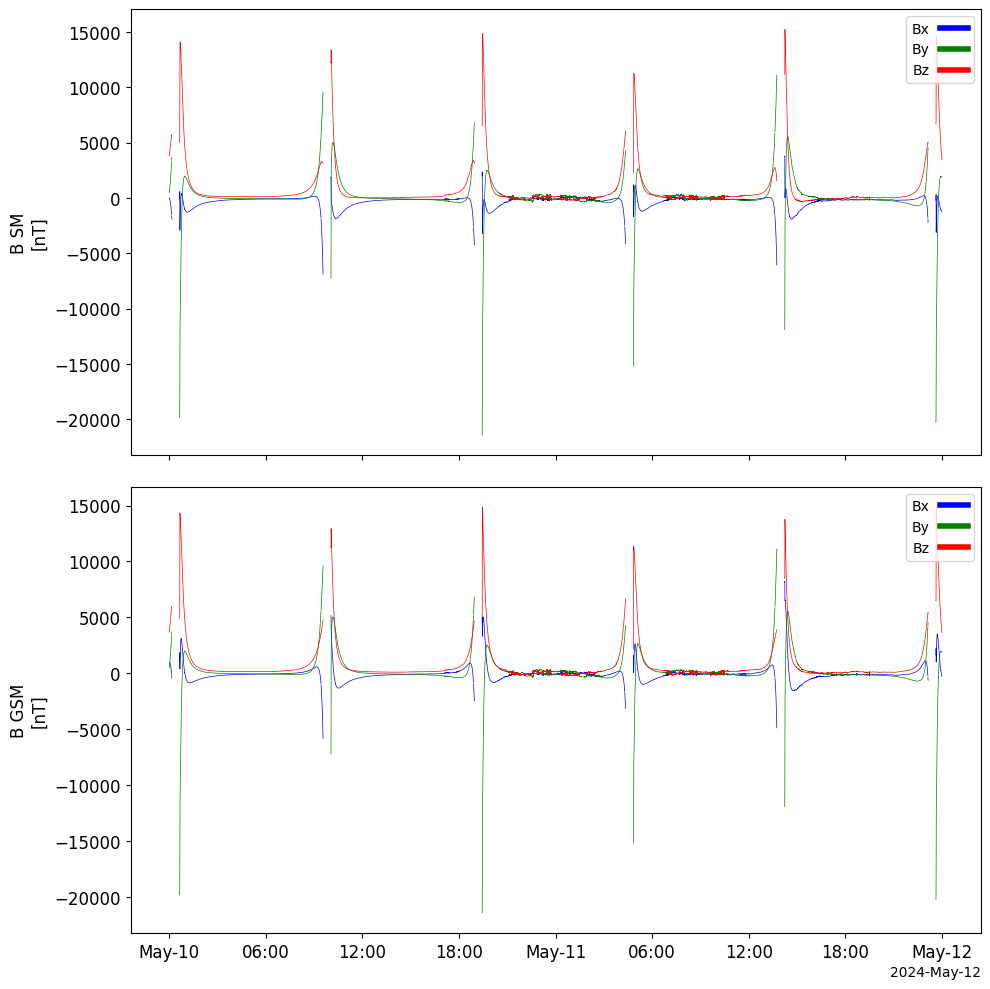

In [5]:
tplot(['erg_mgf_l2_mag_8sec_sm', 'erg_mgf_l2_mag_8sec_gsm'], xsize = 10, ysize = 12)

### 1.3 Limit the time range of a plot: `timespan()`

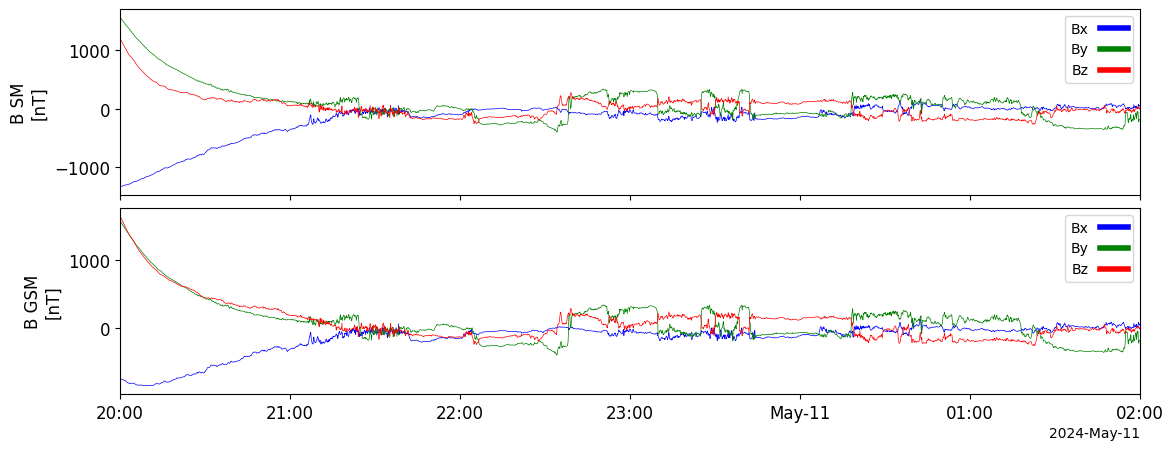

In [8]:
pytplot.timespan( '2024-05-10 20:00:00', 6, keyword='hours')     # Set time span to create the plot of MGF Lv.2 8-s data.
tplot(['erg_mgf_l2_mag_8sec_sm', 'erg_mgf_l2_mag_8sec_gsm'])

### 1.4 Change the vertical scale of a plot with options

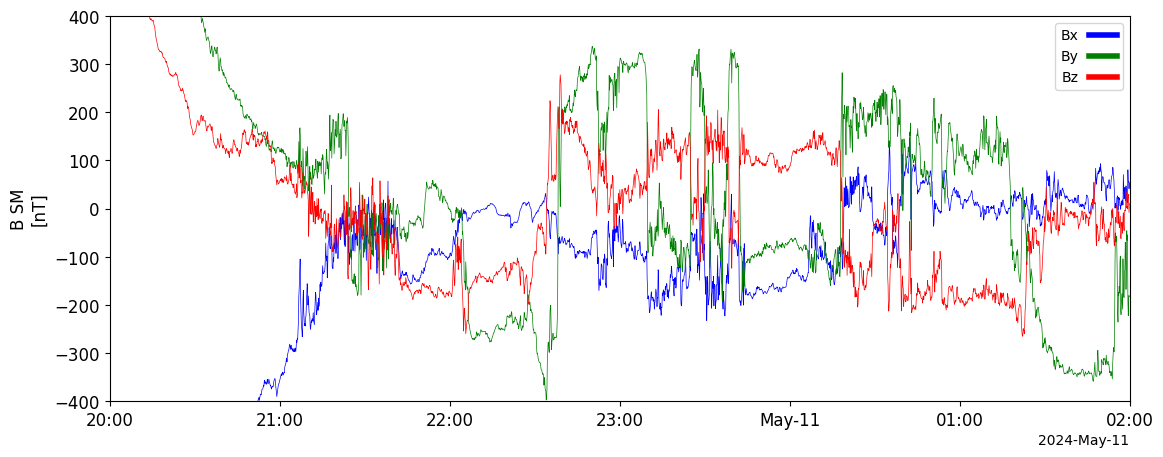

In [7]:
pytplot.options( 'erg_mgf_l2_mag_8sec_sm', 'yrange', [-400., 400.] )        # Set the vertical scale to create the plot of MGF Lv.2 8-s data.
tplot(['erg_mgf_l2_mag_8sec_sm'])

### 1.5 Change the title of the vertical axis: `options()`

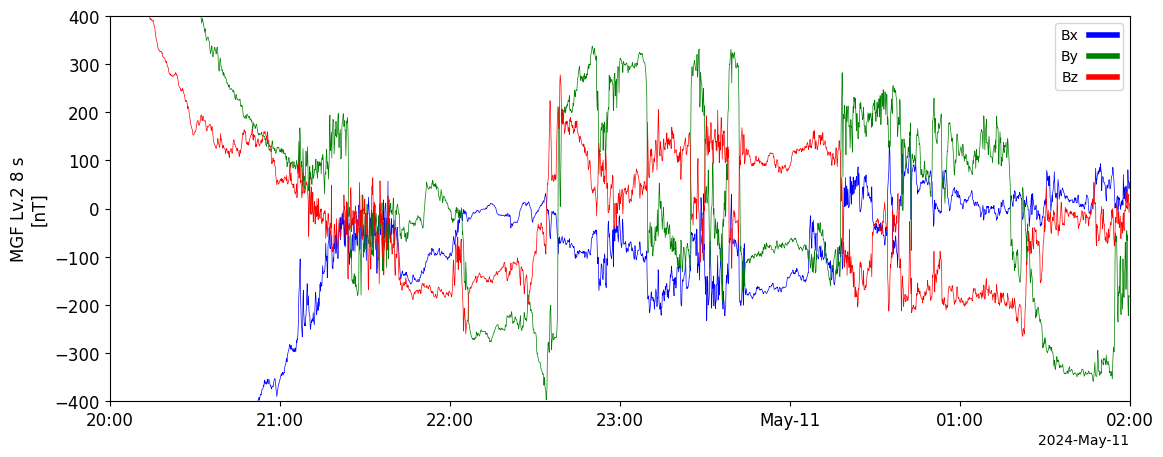

In [8]:
pytplot.options( 'erg_mgf_l2_mag_8sec_sm', 'ytitle', 'MGF Lv.2 8 s')     # Change the title of the vertical axis.
tplot(['erg_mgf_l2_mag_8sec_sm'])

### 1.6 Change the font size of axes: `tplot_options()`




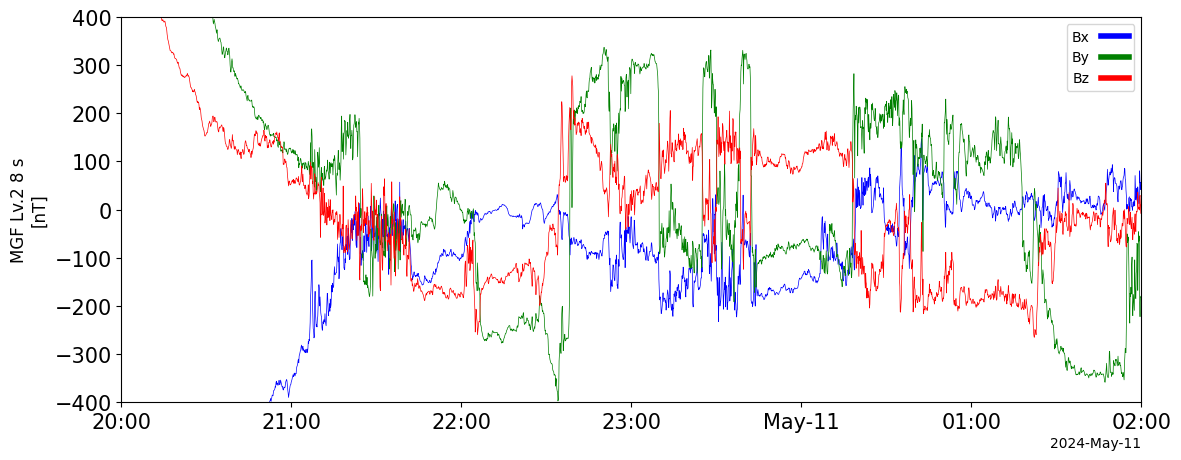

In [9]:
pytplot.tplot_options('axis_font_size', 15)      # Change the font size of axes. The default is 10.
tplot(['erg_mgf_l2_mag_8sec_sm'])

### 1.7 Change the labels and line colors: `options()`

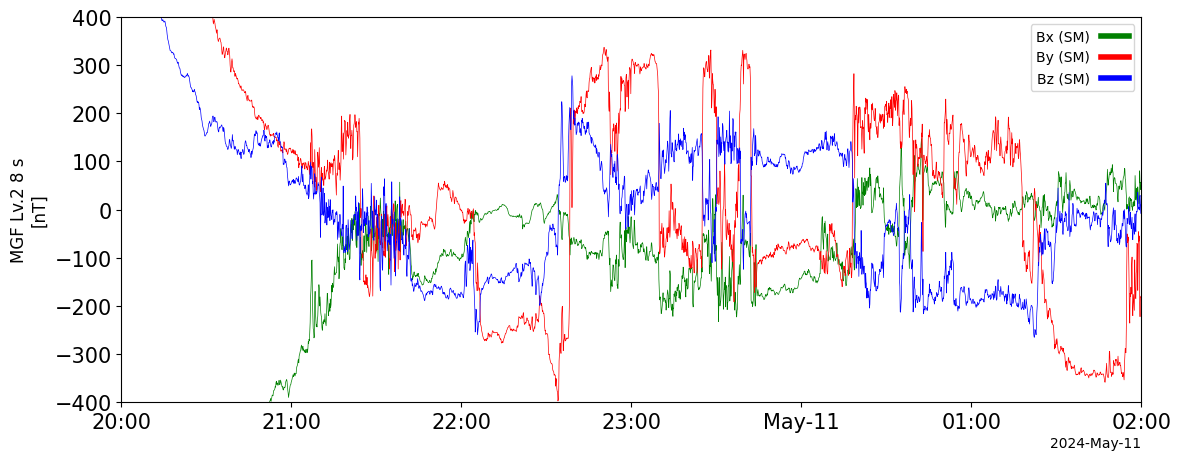

In [10]:
pytplot.options('erg_mgf_l2_mag_8sec_sm', 'legend_names', ['Bx (SM)','By (SM)','Bz (SM)'])  # Change the label.
pytplot.options('erg_mgf_l2_mag_8sec_sm', 'color', ['green','red','blue'])                  # Change the color.
tplot(['erg_mgf_l2_mag_8sec_sm'])

### 1.8 Split the vector data to each component: `split_vec()`

In [11]:
pytplot.split_vec('erg_mgf_l2_mag_8sec_sm')

['erg_mgf_l2_mag_8sec_sm_x',
 'erg_mgf_l2_mag_8sec_sm_y',
 'erg_mgf_l2_mag_8sec_sm_z']

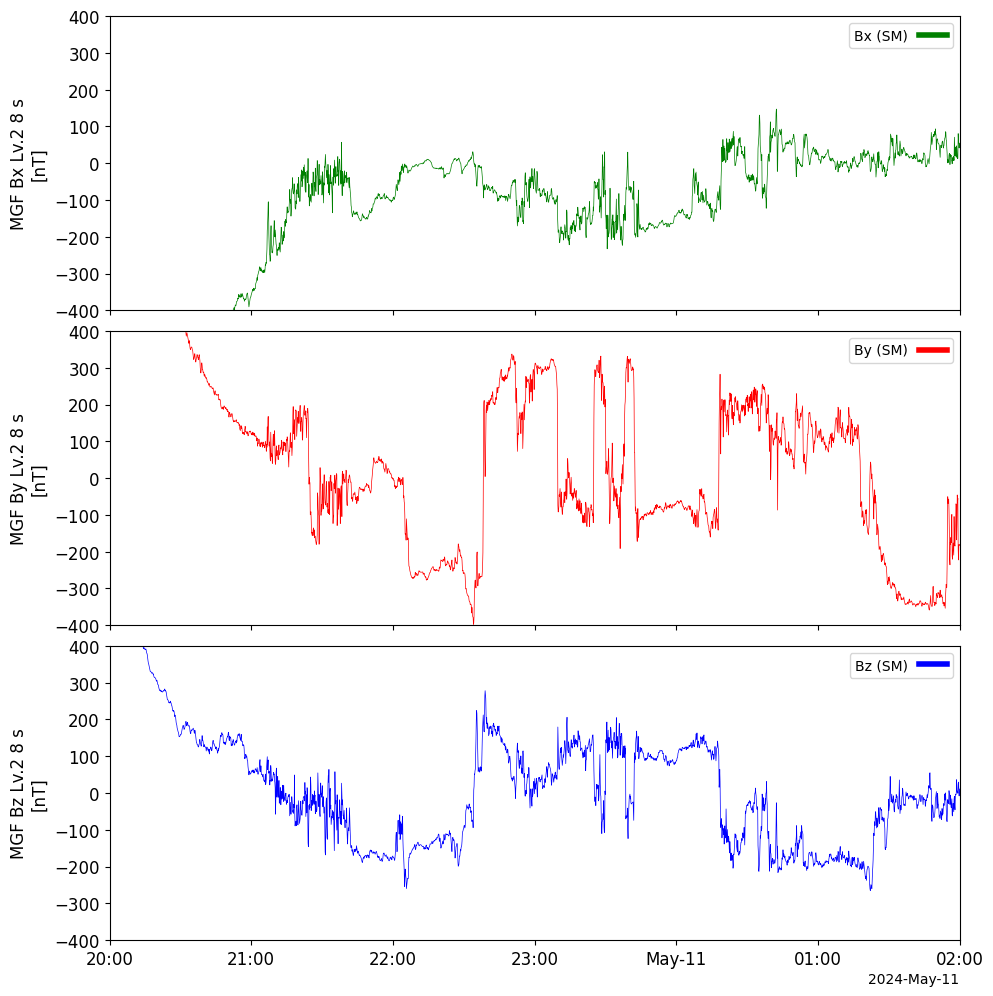

In [12]:
#For Bx component.
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'ytitle', 'MGF Bx Lv.2 8 s')      # Set the title of y-axis.
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'ysubtitle', '[nT]')              # Set the subtitle of y-axis (for unit).
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'legend_names', 'Bx (SM)')        # Set the legend name.
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'color', 'green')                 # Set the line color.
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'charsize', 12)                    # Set the character size.
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'yrange', [-400., 400.] )         # Set the vertical scale.

#For By component.
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'ytitle', 'MGF By Lv.2 8 s')
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'ysubtitle', '[nT]')
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'legend_names', 'By (SM)')
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'color', 'red')
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'charsize', 12)
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'yrange', [-400., 400.] )

#For Bz component.
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'ytitle', 'MGF Bz Lv.2 8 s')
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'ysubtitle', '[nT]')
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'legend_names', 'Bz (SM)')
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'color', 'blue')
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'yrange', [-400., 400.] )
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'charsize', 12)

tplot(['erg_mgf_l2_mag_8sec_sm_x','erg_mgf_l2_mag_8sec_sm_y','erg_mgf_l2_mag_8sec_sm_z'], xsize = 10, ysize = 12)

### 1.9 Save the tplot variables and restore them: `pytplot.tplot_save()`, and `pytplot.tplot_restore()`

In [13]:
pytplot.tplot_save('erg_mgf_l2_mag_8sec_sm_x', filename='erg_mgf_l2_mag_8sec_sm_x.dat') # Save the tplot variable 'erg_mgf_l2_mag_8sec_sm_x'
pytplot.del_data('erg_mgf_l2_mag_8sec_sm_x')                                            # Delete the tplot variable 'erg_mgf_l2_mag_8sec_sm_x'
pytplot.tplot_names()                                                                   # Check tplot variables

0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm
19 : erg_mgf_l2_mag_8sec_sm_y
20 : erg_mgf_l2_mag_8sec_sm_z


['erg_mgf_l2_epoch_8sec',
 'erg_mgf_l2_mag_8sec_dsi',
 'erg_mgf_l2_mag_8sec_gse',
 'erg_mgf_l2_mag_8sec_gsm',
 'erg_mgf_l2_mag_8sec_sm',
 'erg_mgf_l2_magt_8sec',
 'erg_mgf_l2_rmsd_8sec_dsi',
 'erg_mgf_l2_rmsd_8sec_gse',
 'erg_mgf_l2_rmsd_8sec_gsm',
 'erg_mgf_l2_rmsd_8sec_sm',
 'erg_mgf_l2_rmsd_8sec',
 'erg_mgf_l2_n_rmsd_8sec',
 'erg_mgf_l2_dyn_rng_8sec',
 'erg_mgf_l2_quality_8sec',
 'erg_mgf_l2_quality_8sec_gc',
 'erg_mgf_l2_igrf_8sec_dsi',
 'erg_mgf_l2_igrf_8sec_gse',
 'erg_mgf_l2_igrf_8sec_gsm',
 'erg_mgf_l2_igrf_8sec_sm',
 'erg_mgf_l2_mag_8sec_sm_y',
 'erg_mgf_l2_mag_8sec_sm_z']

In [14]:
pytplot.tplot_restore(filename='erg_mgf_l2_mag_8sec_sm_x.dat') # Restore the tplot variable 'erg_mgf_l2_mag_8sec_sm_x'
pytplot.tplot_names()                                          # Check tplot variables

0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm
19 : erg_mgf_l2_mag_8sec_sm_y
20 : erg_mgf_l2_mag_8sec_sm_z
21 : erg_mgf_l2_mag_8sec_sm_x


['erg_mgf_l2_epoch_8sec',
 'erg_mgf_l2_mag_8sec_dsi',
 'erg_mgf_l2_mag_8sec_gse',
 'erg_mgf_l2_mag_8sec_gsm',
 'erg_mgf_l2_mag_8sec_sm',
 'erg_mgf_l2_magt_8sec',
 'erg_mgf_l2_rmsd_8sec_dsi',
 'erg_mgf_l2_rmsd_8sec_gse',
 'erg_mgf_l2_rmsd_8sec_gsm',
 'erg_mgf_l2_rmsd_8sec_sm',
 'erg_mgf_l2_rmsd_8sec',
 'erg_mgf_l2_n_rmsd_8sec',
 'erg_mgf_l2_dyn_rng_8sec',
 'erg_mgf_l2_quality_8sec',
 'erg_mgf_l2_quality_8sec_gc',
 'erg_mgf_l2_igrf_8sec_dsi',
 'erg_mgf_l2_igrf_8sec_gse',
 'erg_mgf_l2_igrf_8sec_gsm',
 'erg_mgf_l2_igrf_8sec_sm',
 'erg_mgf_l2_mag_8sec_sm_y',
 'erg_mgf_l2_mag_8sec_sm_z',
 'erg_mgf_l2_mag_8sec_sm_x']

### 1.10 Get the data from tplot variables: `pytplot.get_data()`

In [15]:
data=pytplot.get_data('erg_mgf_l2_mag_8sec_sm_x')     #Get the data from 'erg_mgf_l2_mag_8sec_sm_x' tplot variable.
time = data[0]                                        #Time data
ydata = data[1]                                       #Magnetic field data

In [16]:
pytplot.time_string(time)                             #Print the time in YYYY-MM-DD HH:MM:SS format.

['2024-05-09 23:59:59.118299',
 '2024-05-10 00:00:03.319048',
 '2024-05-10 00:00:11.361273',
 '2024-05-10 00:00:19.387697',
 '2024-05-10 00:00:27.429921',
 '2024-05-10 00:00:35.472170',
 '2024-05-10 00:00:43.498695',
 '2024-05-10 00:00:51.540719',
 '2024-05-10 00:00:59.567268',
 '2024-05-10 00:01:07.609392',
 '2024-05-10 00:01:15.635917',
 '2024-05-10 00:01:23.678041',
 '2024-05-10 00:01:31.720290',
 '2024-05-10 00:01:39.746814',
 '2024-05-10 00:01:47.788838',
 '2024-05-10 00:01:55.815463',
 '2024-05-10 00:02:03.857712',
 '2024-05-10 00:02:11.884236',
 '2024-05-10 00:02:19.926360',
 '2024-05-10 00:02:27.968485',
 '2024-05-10 00:02:35.995034',
 '2024-05-10 00:02:44.037158',
 '2024-05-10 00:02:52.063582',
 '2024-05-10 00:03:00.105807',
 '2024-05-10 00:03:08.132456',
 '2024-05-10 00:03:16.174580',
 '2024-05-10 00:03:24.216604',
 '2024-05-10 00:03:32.243354',
 '2024-05-10 00:03:40.285478',
 '2024-05-10 00:03:48.312002',
 '2024-05-10 00:03:56.354126',
 '2024-05-10 00:04:04.380876',
 '2024-0

In [17]:
ydata    #Print magnetic field data.

array([   15.60516408,    14.78709203,     7.3596397 , ...,
       -1234.76684753, -1238.55510105, -1242.13103895])

In [18]:
ydata_sq = ydata*ydata    #Calculate a squre of ydata.

In [19]:
ydata_sq   #Print a squre of magnetic field data.

array([2.43521146e+02, 2.18658091e+02, 5.41642966e+01, ...,
       1.52464917e+06, 1.53401874e+06, 1.54288952e+06])

### 1.11 Store the tplot variable from python variable: pytplot.store_data()

In [20]:
# Store the data into tplot variable 'erg_mgf_l2_mag_8sec_sm_x_sq'.
pytplot.store_data('erg_mgf_l2_mag_8sec_sm_x_sq', data={'x':time,'y':ydata_sq})
pytplot.options('erg_mgf_l2_mag_8sec_sm_x_sq', 'ytitle', 'Total magnetic field')
pytplot.options('erg_mgf_l2_mag_8sec_sm_x_sq', 'ysubtitle', '[nT]')
pytplot.tplot_names()

0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm
19 : erg_mgf_l2_mag_8sec_sm_y
20 : erg_mgf_l2_mag_8sec_sm_z
21 : erg_mgf_l2_mag_8sec_sm_x
22 : erg_mgf_l2_mag_8sec_sm_x_sq


['erg_mgf_l2_epoch_8sec',
 'erg_mgf_l2_mag_8sec_dsi',
 'erg_mgf_l2_mag_8sec_gse',
 'erg_mgf_l2_mag_8sec_gsm',
 'erg_mgf_l2_mag_8sec_sm',
 'erg_mgf_l2_magt_8sec',
 'erg_mgf_l2_rmsd_8sec_dsi',
 'erg_mgf_l2_rmsd_8sec_gse',
 'erg_mgf_l2_rmsd_8sec_gsm',
 'erg_mgf_l2_rmsd_8sec_sm',
 'erg_mgf_l2_rmsd_8sec',
 'erg_mgf_l2_n_rmsd_8sec',
 'erg_mgf_l2_dyn_rng_8sec',
 'erg_mgf_l2_quality_8sec',
 'erg_mgf_l2_quality_8sec_gc',
 'erg_mgf_l2_igrf_8sec_dsi',
 'erg_mgf_l2_igrf_8sec_gse',
 'erg_mgf_l2_igrf_8sec_gsm',
 'erg_mgf_l2_igrf_8sec_sm',
 'erg_mgf_l2_mag_8sec_sm_y',
 'erg_mgf_l2_mag_8sec_sm_z',
 'erg_mgf_l2_mag_8sec_sm_x',
 'erg_mgf_l2_mag_8sec_sm_x_sq']

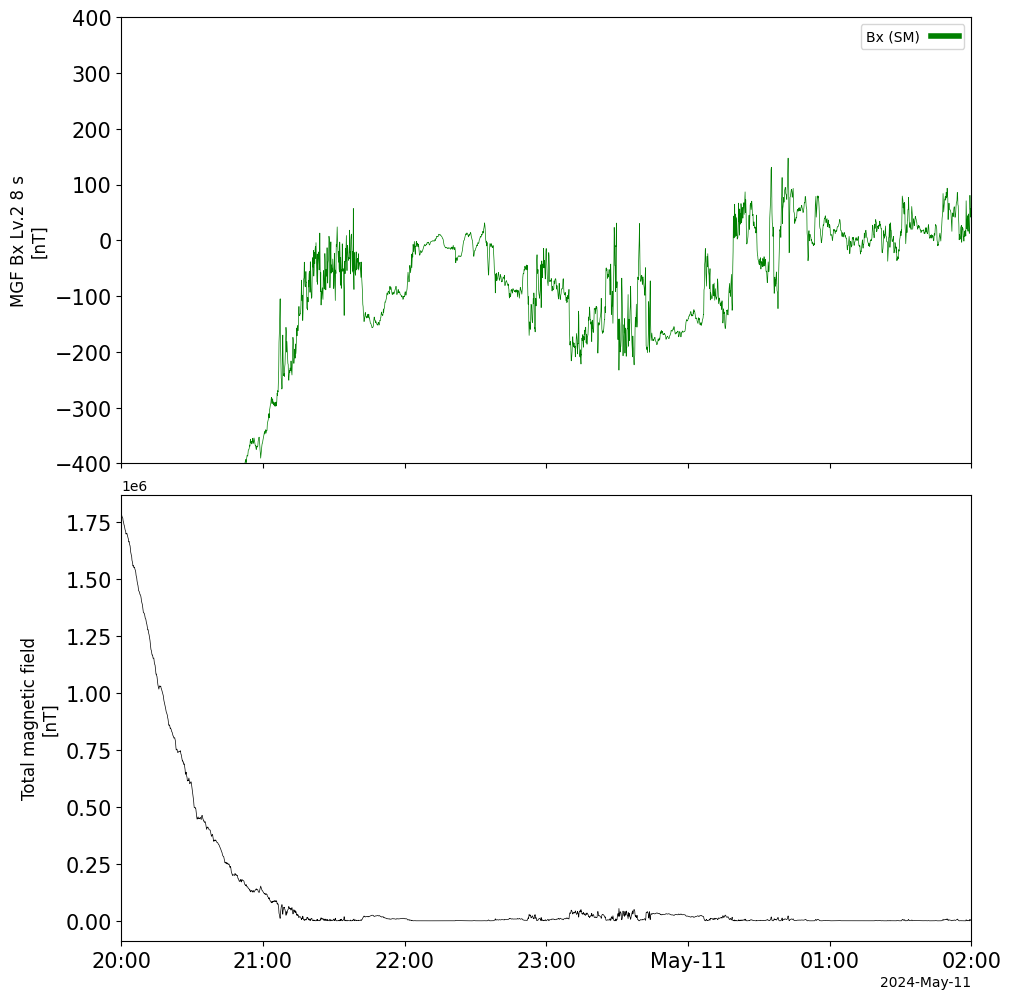

In [21]:
tplot(['erg_mgf_l2_mag_8sec_sm_x', 'erg_mgf_l2_mag_8sec_sm_x_sq'], xsize = 10, ysize = 12)

---------------------------
# Beginner and advanced courses
---------------------------
## 2. Data analysis with pytplot and pySPEDAS

The pytplot and pyspedas tools have various kinds of functions to calculate background substraction, average, time derivative with tplot variables. The available commapnds are listed below.

1. `add(tvar1,tvar2,newname=None, new_tvar=None)`: Adds two tplot variables together.  Will interpolate if the two are not on the same time cadence.
2. `add_across(tvar,column_range=None,newname=None,new_tvar=None)`: Adds across columns in the tplot variable.
3. `avg_res_data(tvar,res,newname=None,new_tvar=None)`: Averages the variable over a specified period of time.
4. `clean_spikes(names, nsmooth=10, thresh=0.3, sub_avg=False, new_names=None,newname=None, suffix=None, overwrite=None)`: Clean spikes from data.
5. `clipChange(tvar,ymin,ymax,newname=None,new_tvar=None)`: out-of-bounds data to NaN.
6. `crop(tvar1,tvar2, replace=True)`: Crops both tplot variable so that their times are the same.  This is done automatically by other processing routines if times do not match up.
7. `deflag(tvar, flag=None, newname=None, new_tvar=None, method=None, fillval=None)`: Replace NaN or other 'flag' values in arrays with interpolated or other values.
8. `degap(tvar, dt=None, margin=0.25, func="nan", newname=None, new_tvar=None, onenanpergap=False, twonanpergap=False)`: Fills gaps in the data either with NaNs or the last number.
9. `derive(tvar,newname=None, new_tvar=None)`: Takes the derivative of the tplot variable.
10. `divide(tvar1,tvar2,newname=None, new_tvar=None)`: Divides two tplot variables.  Will interpolate if the two are not on the same time cadence.
11. `dpwrspc(time, quantity, nboxpoints=256, nshiftpoints=128, bin=3, tbegin=-1.0, tend=-1.0, noline=False, nohanning=False, notperhz=False, notmvariance=False, tm_sensitivity=None)`: Compute power spectra.
12. `flatten(tvar, range=None, newname=None, new_tvar=None)`: Divides the column by an average over specified time
13. `interp_nan(tvar, newname=None, new_tvar=None, s_limit=None)`: Interpolates the tplot variable through NaNs in the data. This is basically just a wrapper for xarray's interpolate_na function.
14. `join_vec(tvars, newname=None, new_tvar=None, merge=False)`: Joins 1D tplot variables into one tplot variable.
15. `makegap(var_data, dt=None, margin=0.0, func="nan")`: Fill gaps in the data either with NaNs or the last number.  This is identical to degap, except operates directly on the data and time arrays, rather than the tplot variable. This is intended for use with the data_gap option. This version actually puts the data into a temporary tplot variable, and call degap, then extracts that data into the proper form.
16. `multiply(tvar1, tvar2, newname=None, new_tvar=None)`: Multiplies two tplot variables.  Will interpolate if the two are not on the same time cadence.
17. `pwr_spec(tvar, nbp=256, nsp=128, newname=None)`: Calculates the power spectrum of a line, and adds a tplot variable for this new spectrogram.
18. `pwrspc(time, quantity, noline=False, nohanning=False, bin=3, notperhz=False)`: Compute the power spectrum of a given time series.
19. `spec_mult(tvar, newname=None, new_tvar=None)`: Multiplies the data by the stored spectrogram bins and created a new tplot variable.
20. `split_vec(tvar, polar=False, newname=None, new_name=None, columns='all', suffix=None)`: Splits up 2D data into many 1D tplot variables. Takes a   stored tplot vector like Vp and stores tplot variables Vp_x, Vp_y, Vp_z.
21. `subtract(var1, tvar2, newname=None, new_tvar=None)`: Subtracts two tplot variables.  Will interpolate if the two are not on the same time cadence.
22. `subtract_average(names, newname=None, new_names=None, suffix=None, overwrite=None, median=None)`: Subtracts the average or median from data.
22. `tcrossp(v1, v2, newname=None, return_data=False)`: Calculates the cross product of two tplot variables.
23. `tdeflag(names, flag=None, method='remove_nan', newname=None, new_names=None, suffix=None, overwrite=None, fillval=None)`: Replaces FLAGs in arrays with interpolated or other values.
24. `tdotp(variable1, variable2, newname=None)`: Calculate the sample-by-sample dot product of two tplot variables
25. `tdpwrspec(varname, newname=None, trange=["0.0", "0.0"], nboxpoints=None, nshiftpoints=None, polar=False, bin=3, nohanning=False, noline=False, notperhz=False, notmvariance=False)`: Compute power spectra for a tplot variable.
26. `time_clip(names, time_start, time_end, newname=None, new_names=None, suffix='-tclip', overwrite=False)`: Clip data from time_start to time_end.
27. `tinterp(tvar1,tvar2,replace=False)`: Interpolates one tplot variable to another one's time cadence.  This is done automatically by other processing routines.
28. `tkm2re(name, km=False, newname=None, suffix='')`: Converts a tplot variable to Re or Km.
29. `tnormalize(variable, newname=None, return_data=False)`: Normalize all the vectors stored in a tplot variable
30. `tpwrspc(varname, newname=None, overwrite=False, noline=False, nohanning=False, bin=3, notperhz=False, trange=None, axis=0)`: This function is a wrapper for pwrspc. It applies pwrspc to a pytplot variable and stores the result in a new pytplot variable.
31. `tsmooth(names, width=10, median=None, preserve_nans=None, newname=None, new_names=None, suffix=None, overwrite=None)`: Smooths a tplot variable.


### 2.1 Subtract the bakground with sub_average command

In [9]:
from ergpyspedas.util import subtract_average
#from pytplot import subtract_average #This will be available in the future.
# Subtract the background with pytplot.subtract_average or median
subtract_average('erg_mgf_l2_mag_8sec_sm', median=False)   # Subtract average value.
subtract_average('erg_mgf_l2_mag_8sec_sm', median=True)    # Subtract median value.

12-Sep-24 13:52:34: Subtract Mean was applied to: erg_mgf_l2_mag_8sec_sm-d
12-Sep-24 13:52:34: Subtract Median was applied to: erg_mgf_l2_mag_8sec_sm-m


['erg_mgf_l2_mag_8sec_sm-m']

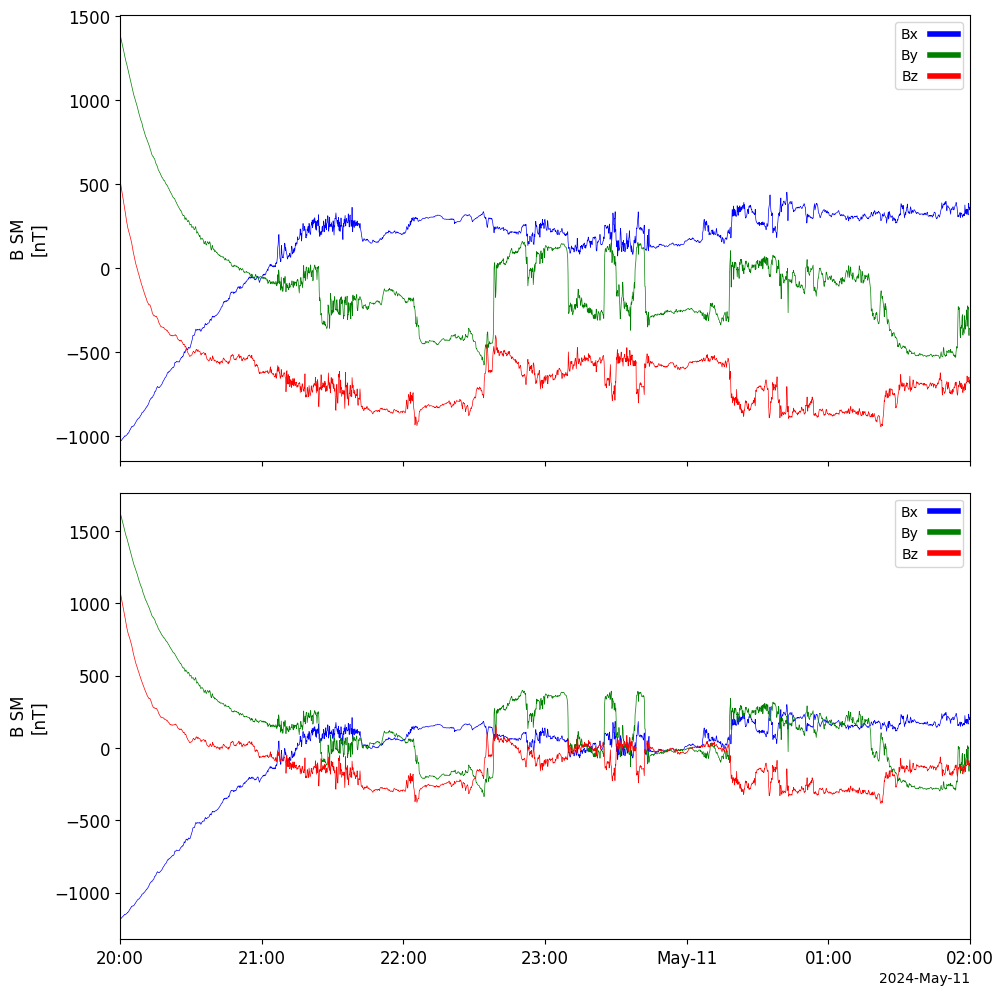

In [10]:
tplot(['erg_mgf_l2_mag_8sec_sm-d', 'erg_mgf_l2_mag_8sec_sm-m'], xsize = 10, ysize = 12)

### 2.2 Join seveal tplot variables into a tplot variable with join_vec command

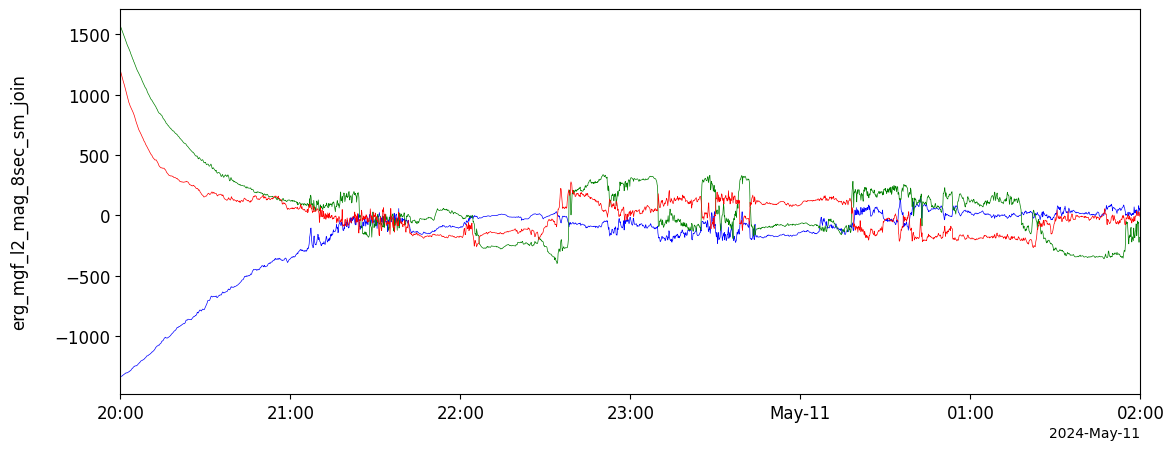

In [13]:
from pytplot import join_vec
join_vec(['erg_mgf_l2_mag_8sec_sm_x','erg_mgf_l2_mag_8sec_sm_y','erg_mgf_l2_mag_8sec_sm_z'],newname='erg_mgf_l2_mag_8sec_sm_join')
tplot('erg_mgf_l2_mag_8sec_sm_join')

### 2.3 Analysis of Fourier spectrum: `pyspedas.tdpwrspc()`

In [14]:
pytplot.tdpwrspc('erg_mgf_l2_mag_8sec_sm',nboxpoints=128, nshiftpoints=8)  #Calculate Fourier spectra of MGF data with a window of 128*8 sec and a time shift of 8 sec.

['erg_mgf_l2_mag_8sec_sm_x_dpwrspc',
 'erg_mgf_l2_mag_8sec_sm_y_dpwrspc',
 'erg_mgf_l2_mag_8sec_sm_z_dpwrspc']

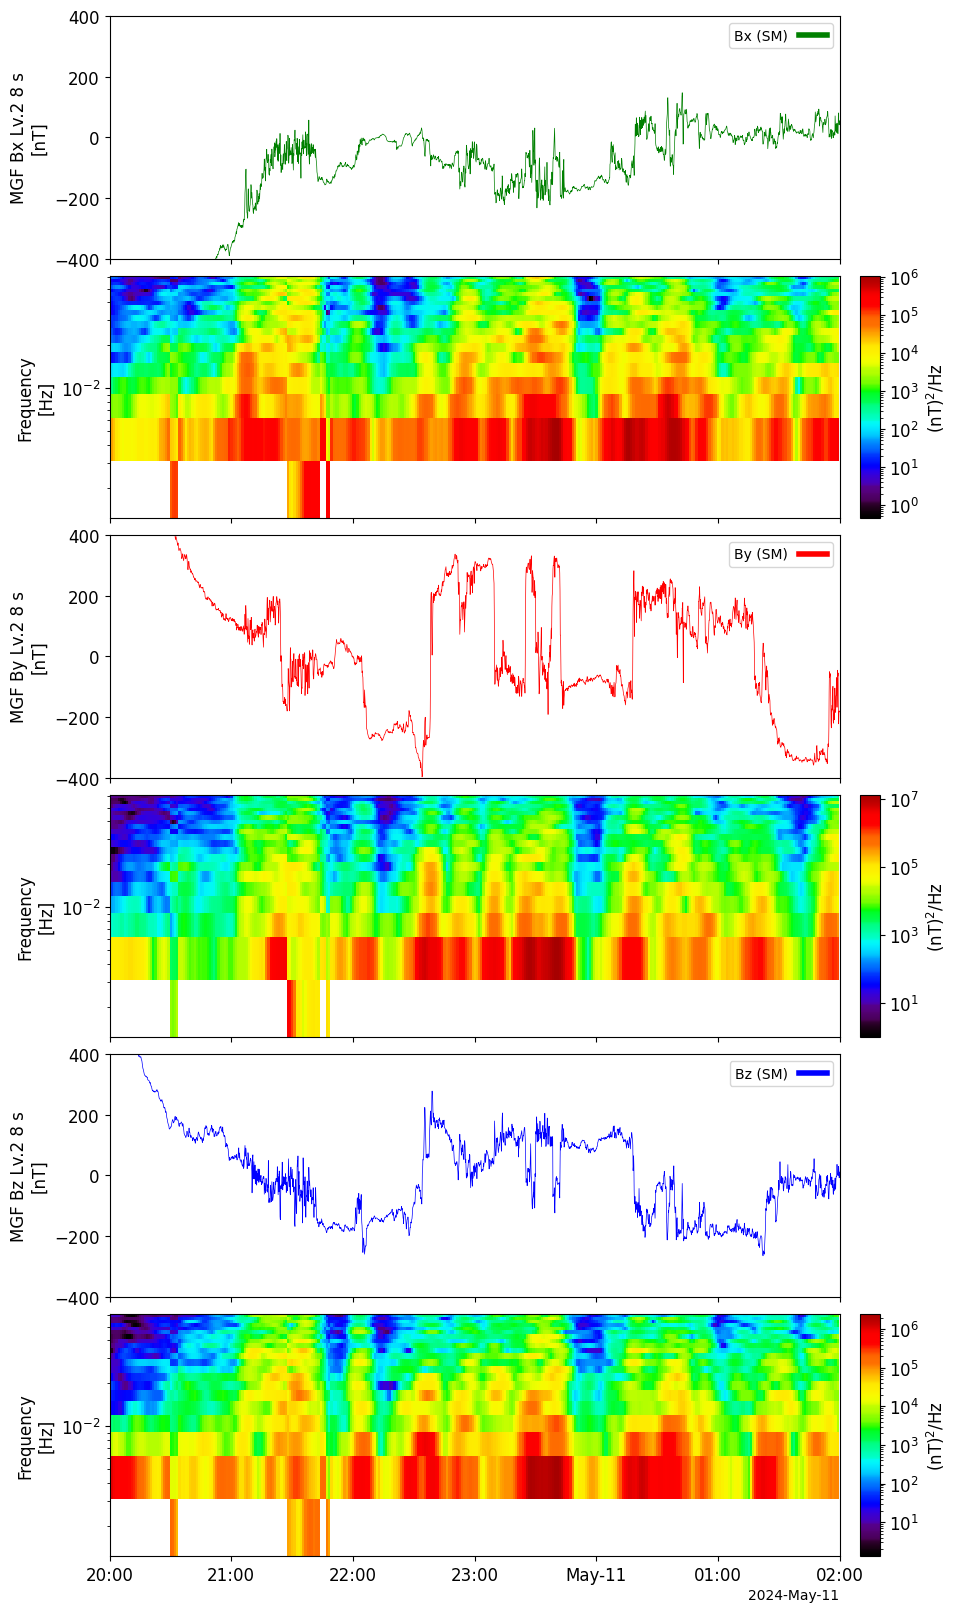

In [15]:
#Add the plot option of x and y no sample for usage of google coab.
#pytplot.options(['erg_mgf_l2_mag_8sec_sm_x_dpwrspc','erg_mgf_l2_mag_8sec_sm_y_dpwrspc','erg_mgf_l2_mag_8sec_sm_z_dpwrspc'],'x_no_resample', 1)
#pytplot.options(['erg_mgf_l2_mag_8sec_sm_x_dpwrspc','erg_mgf_l2_mag_8sec_sm_y_dpwrspc','erg_mgf_l2_mag_8sec_sm_z_dpwrspc'],'y_no_resample', 1)

# Change the title of the vertical axis.
pytplot.options( 'erg_mgf_l2_mag_8sec_sm_x_dpwrspc','ytitle', 'Frequency')
pytplot.options( 'erg_mgf_l2_mag_8sec_sm_y_dpwrspc','ytitle', 'Frequency')
pytplot.options( 'erg_mgf_l2_mag_8sec_sm_z_dpwrspc','ytitle', 'Frequency')

#For Bx component.
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'ytitle', 'MGF Bx Lv.2 8 s')      # Set the title of y-axis.
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'ysubtitle', '[nT]')              # Set the subtitle of y-axis (for unit).
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'legend_names', 'Bx (SM)')        # Set the legend name.
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'color', 'green')                 # Set the line color.
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'charsize', 12)                   # Set the character size.
pytplot.options('erg_mgf_l2_mag_8sec_sm_x', 'yrange', [-400., 400.] )         # Set the vertical scale.

#For By component.
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'ytitle', 'MGF By Lv.2 8 s')
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'ysubtitle', '[nT]')
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'legend_names', 'By (SM)')
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'color', 'red')
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'charsize', 12)
pytplot.options('erg_mgf_l2_mag_8sec_sm_y', 'yrange', [-400., 400.] )

#For Bz component.
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'ytitle', 'MGF Bz Lv.2 8 s')
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'ysubtitle', '[nT]')
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'legend_names', 'Bz (SM)')
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'color', 'blue')
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'yrange', [-400., 400.] )
pytplot.options('erg_mgf_l2_mag_8sec_sm_z', 'charsize', 12)

#Plot the three magnetic field components and thier Fourier spectra with x and y sizes of 10 and 20, respectively..
tplot(['erg_mgf_l2_mag_8sec_sm_x','erg_mgf_l2_mag_8sec_sm_x_dpwrspc','erg_mgf_l2_mag_8sec_sm_y','erg_mgf_l2_mag_8sec_sm_y_dpwrspc','erg_mgf_l2_mag_8sec_sm_z','erg_mgf_l2_mag_8sec_sm_z_dpwrspc'], xsize = 10, ysize = 20)

### 2.4 Plot spectrum-type data and change the contour scale: `zlim()` [Beginner course]

12-Sep-24 13:59:32: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2024/05/
12-Sep-24 13:59:33: File is current: erg_data/satellite/erg/pwe/ofa/l2/spec/2024/05/erg_pwe_ofa_l2_spec_20240510_v02_03.cdf
12-Sep-24 13:59:34: File is current: erg_data/satellite/erg/pwe/ofa/l2/spec/2024/05/erg_pwe_ofa_l2_spec_20240511_v02_03.cdf


 
 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data']

Information about ERG PWE OFA

PI:  ['Yoshiya Kasahara']
Affiliation:  ['Kanazawa University']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


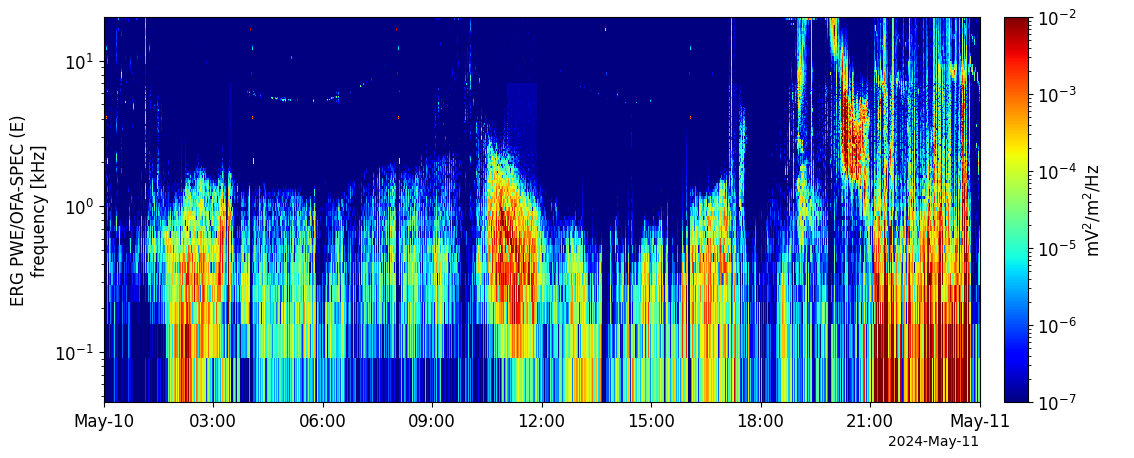

In [16]:
from pyspedas.erg import pwe_ofa                                                #Import pwe_ofa module from pyspedas.erg.
tr=['2024-05-10', '2024-05-12']                                                 # Set time range to load PWE-OFA data.
ID = '********'                                                              # Set ID for downloading Arase data.
pw = '********'                                                                 # Set password for downloading Arase data.
pwe_ofa( trange=tr, uname = ID, passwd = pw)                                    #Load PWE_OFA data for a period from 2024-05-10 00:00:00 to 2024-05-12 00:00:00.
pytplot.timespan( '2024-05-10 00:00:00', 1)                                     #Set time span from 2024-05-10 00:00:00 to 2024-05-11 00:00:00.
pytplot.zlim('erg_pwe_ofa_l2_spec_E_spectra_132', 1e-7, 1e-2 )                  #Change the contour range.

#Add the plot option of x and y no sample for usage of google coab.
#pytplot.options('erg_pwe_ofa_l2_spec_E_spectra_132','x_no_resample', 1)
#pytplot.options('erg_pwe_ofa_l2_spec_E_spectra_132','y_no_resample', 1)

pytplot.options('erg_pwe_ofa_l2_spec_E_spectra_132','data_gap', 60)             #This option is no plot of the data for a period when there are no data for more than 60 seconds.
tplot( 'erg_pwe_ofa_l2_spec_E_spectra_132' )


In [ ]:
vars = pytplot.tplot_names()

In [ ]:
#pytplot.del_data('erg_*')
#pytplot.tplot_names()

### 2.5 Calculate new parameters with tplot variables [Advanced course]
#### 2.5.1 Derive the electron and proton cyclotron frequencies (fce and fcp) and create fce and fcp tplot variables
In this exercise, we calculate the plasma characteristic frequencies with total magnetic field data stored in tplot variable.

Electron cyclotron frequency: fce = 1/(2pi)*e*B/me

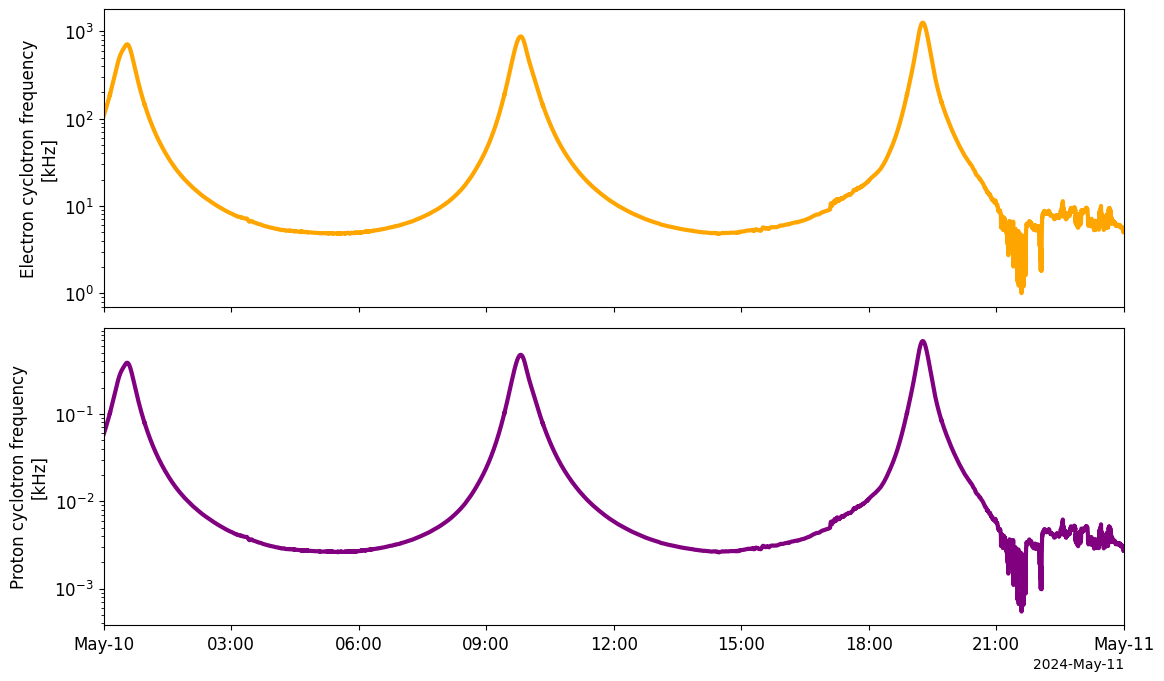

In [17]:
import math
btotal = pytplot.get_data('erg_mgf_l2_magt_8sec')             # Get total magnetic field data.
e = 1.602176634E-19                                           # Elementary charge [C]
me = 9.1093837E-31                                            # Electron mass [kg]
mp= 1.67252E-27                                               # Proton mass [kg]
fce = 1.0/(2.0 * math.pi) * e * btotal[1] / me * 1.0E-12       # Electron cyclotron frequency [kHz]
fcp = 1.0/(2.0 * math.pi) * e * btotal[1] / mp * 1.0E-12       # Electron cyclotron frequency [kHz]
pytplot.store_data('fce', data ={'x':btotal[0],'y':fce})      # Create fce tplot variable.
pytplot.store_data('fcp', data ={'x':btotal[0],'y':fcp})      # Create fce tplot variable.
pytplot.options('fce', 'ytitle', 'Electron cyclotron frequency')
pytplot.options('fce', 'ysubtitle', '[kHz]')
pytplot.options('fce', 'color', 'orange')
pytplot.options('fce', 'thick', 3)
pytplot.options('fce', 'ylog' , 1)
pytplot.options('fcp', 'ytitle', 'Proton cyclotron frequency')
pytplot.options('fcp', 'ysubtitle', '[kHz]')
pytplot.options('fcp', 'color', 'purple')
pytplot.options('fcp', 'thick', 3)
pytplot.options('fcp', 'ylog' , 1)
pytplot.timespan( '2024-05-10 00:00:00', 1, keyword='days')
tplot(['fce','fcp'], ysize = 8)

#### 2.5.2 Overplot the fce cruve on the OFA spectrum plot
How to create tplot variable joining two tplot variables.
pytplot.store_data(newvar, data='tvar1 tvar2')

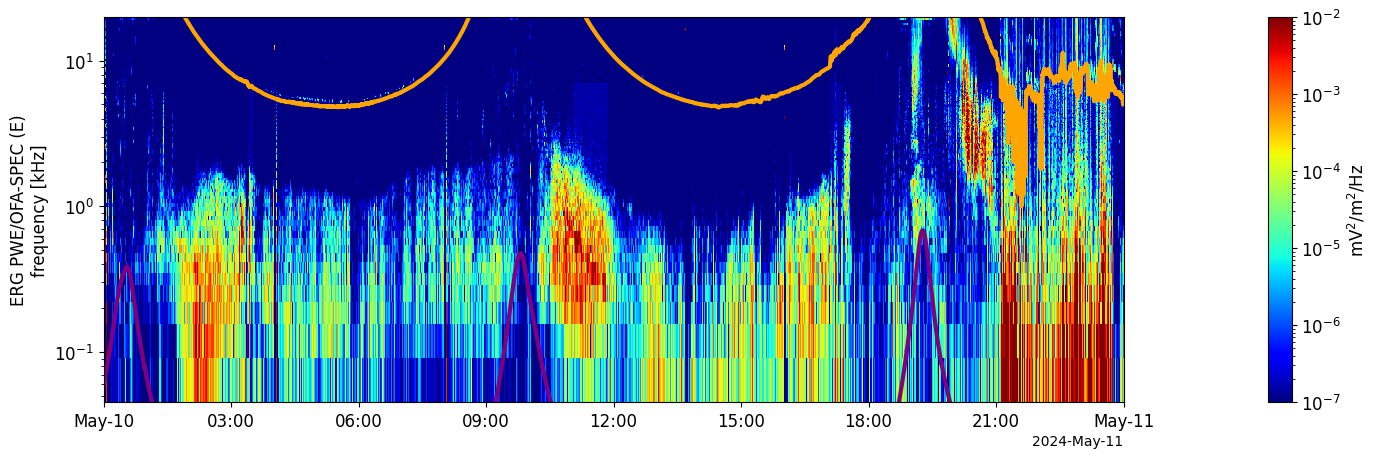

In [18]:
pytplot.store_data('erg_pwe_ofa_l2_spec_E_spectra_132_fc', data='fce fcp erg_pwe_ofa_l2_spec_E_spectra_132')
pytplot.options('fce', 'right_axis', False)
pytplot.tplot_options('xmargin', [0.1, 0.05])    ## Default: [0.1, 0.05]
tplot('erg_pwe_ofa_l2_spec_E_spectra_132_fc')

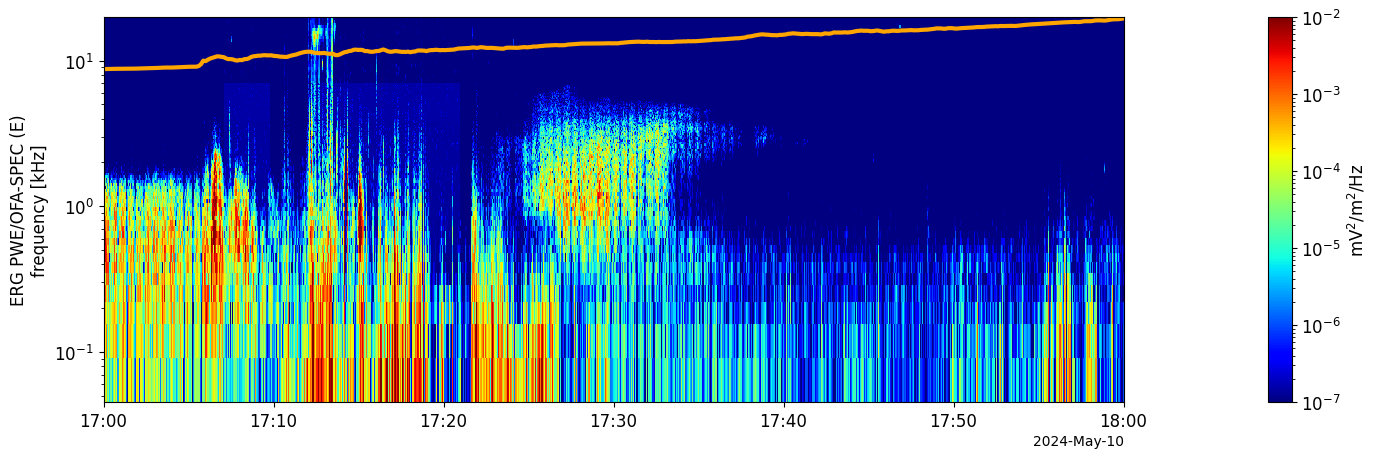

In [19]:
pytplot.timespan('2024-05-10 17:00:00', 1, keyword='hours')
tplot('erg_pwe_ofa_l2_spec_E_spectra_132_fc')

### 2.6 Show the list of loaded tplot variables: `tplot_names()`

In [ ]:
pytplot.tplot_names()

### 2.7 Remove tplot variables that have been loaded

In [ ]:
pytplot.del_data('erg_*')
pytplot.tplot_names()

-----------------
# Advanced course
-----------------
## 3. Draw the world map and overplot Arase and ground-based (OMTI) image data

In this exercise, we install the cartopy library to create the world map and display it with several commands. Further, we create some two-dimensinal world maps overplotted with several kinds of observation data.

### 3.1 Install the cartopy library to handle map data

In [20]:
!pip install cartopy

12-Sep-24 14:07:33: C:\Users\shinb\pyspedas\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)

12-Sep-24 14:07:33: C:\Users\shinb\pyspedas\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)

12-Sep-24 14:07:33: C:\Users\shinb\pyspedas\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)



### 3.2 Create Japanese map and add the location of ISAS/JAXA on the map.
Detailed tips of how tow use the cartopy library are found in the following webpages.

 https://metpost.hatenablog.com/entry/2015/11/05/180006

 https://yyousuke.github.io/matplotlib/cartopy.html

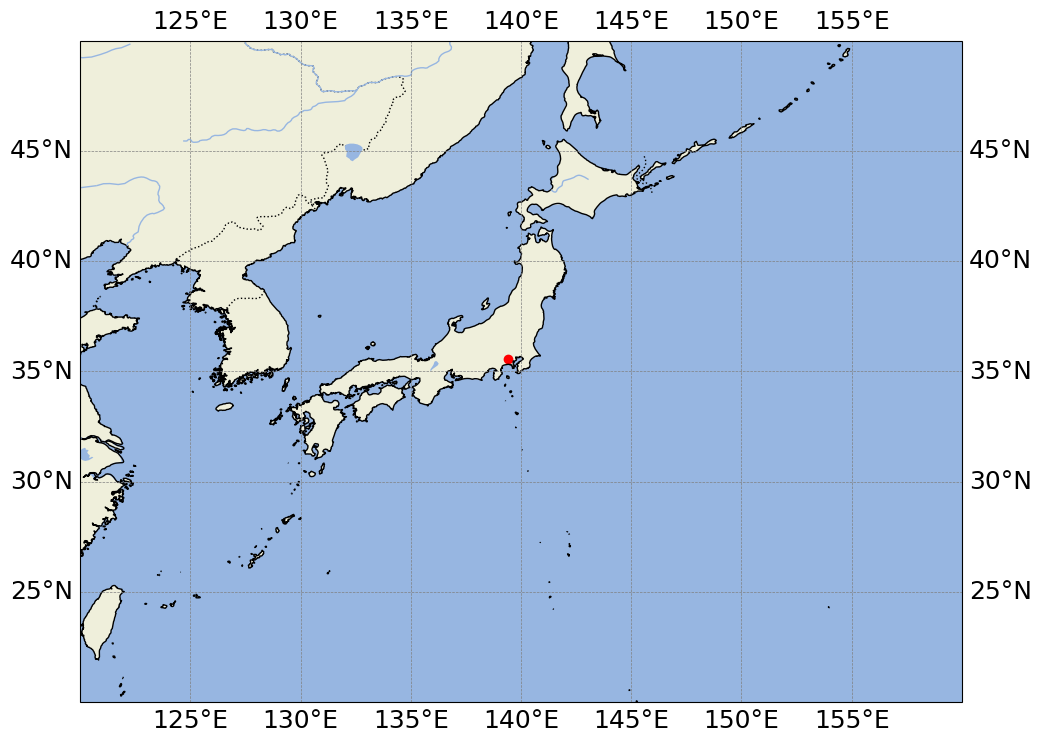

In [21]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(294/25.4, 210/25.4))
ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.PlateCarree())
# ---
# If you want to draw other maps, you should replace 6 line by the following lines.
# Many projections are prepared in the cartopy library
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.Mercator())
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.Robinson())
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.LambertCylindrical())
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.LambertConformal())

# --- Set draw range of longitude and latitude.
ax.set_extent([120, 160, 20, 50], crs=ccrs.PlateCarree())

# --- Draw coast lines with high resolution (10m interval).
ax.coastlines(resolution='10m', color='black', linewidth=1)

# --- Add color in the land.
ax.add_feature(cfeature.LAND)

# --- Add color in the ocean.
ax.add_feature(cfeature.OCEAN)

# --- Draw borders with the dotted line.
ax.add_feature(cfeature.BORDERS, linestyle=':')

# --- Draw lakes.
ax.add_feature(cfeature.LAKES)

# --- Draw rivers.
ax.add_feature(cfeature.RIVERS)

# --- Draw the location of ISAS/JAXA.
ax.scatter(139.394778, 35.558726, color = 'red', transform=ccrs.PlateCarree())

# --- Draw the grid lines of latitude and longitude.
ax.gridlines(linestyle='dashed', color='gray', linewidth=0.5,  draw_labels=True)

# --- Set font size for all labels.
plt.rcParams["font.size"] = 18

plt.show()

 ### 3.3 Overplot the footprint of the Arase orbit on the Japanese map

12-Sep-24 14:13:08: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2022/
12-Sep-24 14:13:08: File is current: erg_data/satellite/erg/orb/def/2022/erg_orb_l2_20220115_v04.cdf
12-Sep-24 14:13:08: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmppuh8yaqp.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:13:08: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmp5e7xhmmj.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)



 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


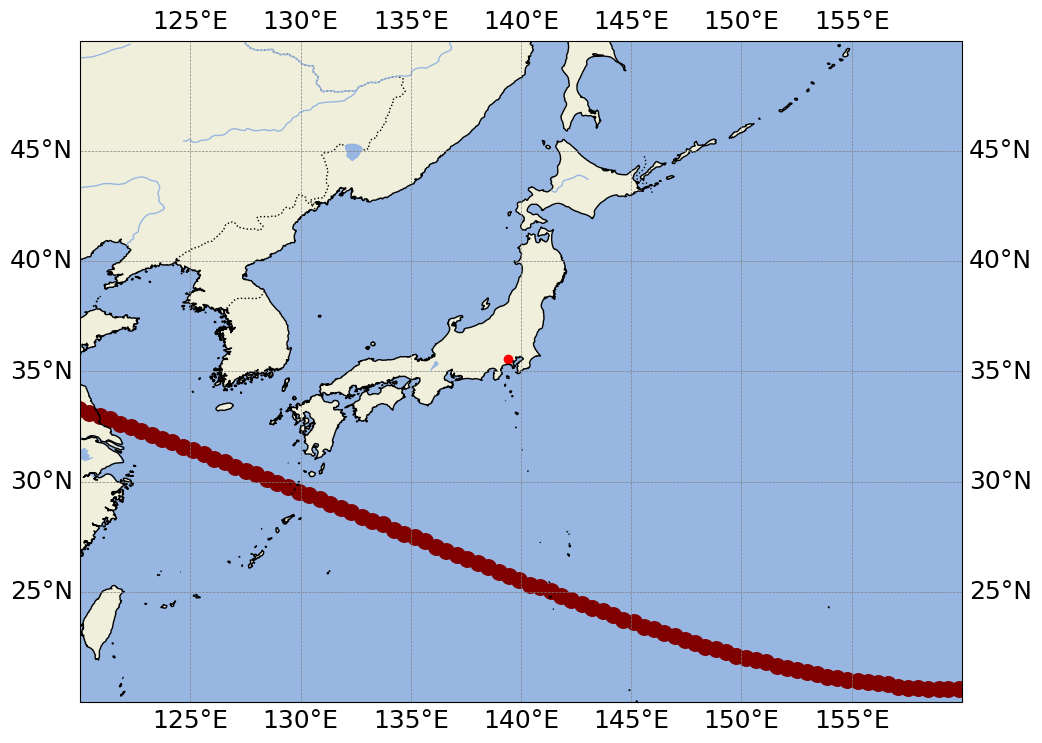

In [22]:
import pytplot
from ergpyspedas.erg import orb

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

tr = ['2022-01-15/07:00', '2022-01-15/11:00']
orb = orb(trange = tr)
pytplot.split_vec('erg_orb_l2_pos_iono_north')
erg_ft_glat = pytplot.get_data('erg_orb_l2_pos_iono_north_0')
erg_ft_glon = pytplot.get_data('erg_orb_l2_pos_iono_north_1')

fig = plt.figure(figsize=(294/25.4, 210/25.4))
ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.PlateCarree())
# ---
# If you want to draw other maps, you should replace 6 line by the following lines.
# Many projections are prepared in the cartopy library
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.Mercator())
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.Robinson())
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.LambertCylindrical())
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.LambertConformal())

# --- Set draw range of longitude and latitude.
ax.set_extent([120, 160, 20, 50], crs=ccrs.PlateCarree())

# --- Draw coast lines with high resolution (10m interval).
ax.coastlines(resolution='10m', color='black', linewidth=1)

# --- Add color in the land.
ax.add_feature(cfeature.LAND)

# --- Add color in the ocean.
ax.add_feature(cfeature.OCEAN)

# --- Draw borders with the dotted line.
ax.add_feature(cfeature.BORDERS, linestyle=':')

# --- Draw lakes.
ax.add_feature(cfeature.LAKES)

# --- Draw rivers.
ax.add_feature(cfeature.RIVERS)

# --- Draw the location of ISAS/JAXA.
ax.scatter(139.394778, 35.558726, color = 'red', transform=ccrs.PlateCarree())

# Plot the footprint of Arase orbit  at an altitude of the ionosphere.
ax.scatter(erg_ft_glon.y,erg_ft_glat.y, transform=ccrs.PlateCarree(), marker='.', color= 'maroon',  s= 500)

# --- Draw the grid lines of latitude and longitude.
ax.gridlines(linestyle='dashed', color='gray', linewidth=0.5,  draw_labels=True)

# --- Set font size for all labels.
plt.rcParams["font.size"] = 18

plt.show()


### 3.3 Load OMTI image data and analyze them (conversion from count to Rayleigh, create mapping data in geographical coordinates)
In this analsis, we deal with the SAR arc event observed at Nyrölä in Finland reported by Inaba et al. [2020].

Analysis flow of OMTI image data:
1. Load OMTI image data (3.3.1)
2. Convert the count to Rayleigh values (3.3.2)
3. Create mapping table and mapped image data in geographic coordinates (3.3.3)
4. Plot mapped image data (3.3.4)

#### 3.3.1 Load OMTI image data at the Nyrölä station for a period from 22:00 to 23:00 UT on 28 March 2017.

In [23]:
from ergpyspedas.erg import camera_omti_asi
tr = ['2017-03-28/22:00:00', '2017-03-28/23:00:00']                      # Set time range to load data.
wg = [6300, 5725]                                                        # Set wavelength.
omti_var = camera_omti_asi(trange = tr, site = 'nyr', wavelength = wg)

12-Sep-24 14:15:06: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/ground/camera/omti/asi/nyr/2017/03/28/
12-Sep-24 14:15:06: File is current: erg_data/ground/camera/omti/asi/nyr/2017/03/28/omti_asi_ci2_nyr_6300_2017032822_v01.cdf
12-Sep-24 14:15:06: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpkcicpfaz.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:15:06: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpt3fkau78.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)



**************************************************************************
['Optical Mesosphere Thermosphere Imagers All-Sky Imager Data']

Information about ['NYR']
PI: ['Kazuo Shiokawa and Yuichi Otsuka']

Affiliations: ['Institute for Space-Earth Environmental Research, Nagoya University, Furo-cho, Chikusa-ku, Nagoya, Aichi 464-8601, Japan']

Rules of the Road for OMTI ASI Data Use:
1. Please contact the Principal Investigator (PI), K. Shiokawa (shiokawa at nagoya-u.jp) or Y. Otsuka, ISEE, Nagoya University before using the data at any publications and/or presentations.
2. Please cite Shiokawa et al. (1999) and/or Shiokawa et al. (2009) in the publication. The detailed citation is:
    * Shiokawa et al., Earth Planets Space, 51, p.887-896, 1999.
    * Shiokawa et al., Earth Planets Space, 61, p.479-491, 2009.
['For more information, see http://stdb2.isee.nagoya-u.ac.jp/omti/']
**************************************************************************


12-Sep-24 14:15:07: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmprr3hw_7d.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:15:07: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/ground/camera/omti/asi/nyr/2017/03/28/
12-Sep-24 14:15:07: File is current: erg_data/ground/camera/omti/asi/nyr/2017/03/28/omti_asi_ci5_nyr_5725_2017032822_v01.cdf
12-Sep-24 14:15:07: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmplwoyzusn.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:15:07: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmp7mcq3dto.cdf

**************************************************************************
['Optical Mesosphere Thermosphere Imagers All-Sky Imager Data']

Information about ['NYR']
PI: ['Kazuo Shiokawa and Yuichi Otsuka']

Affiliations: ['Institute for Space-Earth Environmental Research, Nagoya University, Furo-cho, Chikusa-ku, Nagoya, Aichi 464-8601, Japan']

Rules of the Road for OMTI ASI Data Use:
1. Please contact the Principal Investigator (PI), K. Shiokawa (shiokawa at nagoya-u.jp) or Y. Otsuka, ISEE, Nagoya University before using the data at any publications and/or presentations.
2. Please cite Shiokawa et al. (1999) and/or Shiokawa et al. (2009) in the publication. The detailed citation is:
    * Shiokawa et al., Earth Planets Space, 51, p.887-896, 1999.
    * Shiokawa et al., Earth Planets Space, 61, p.479-491, 2009.
['For more information, see http://stdb2.isee.nagoya-u.ac.jp/omti/']
**************************************************************************


#### 3.3.2 Convert count to Rayleigh data.

In [24]:
from ergpyspedas.erg import tabsint
tabsint(site ='nyr', wavelength = [6300, 5725])

12-Sep-24 14:15:59: File is current: erg_data/ergsc/ground/camera/omti/asi/calibrated_files/calibrated_files.zip


0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm
19 : erg_mgf_l2_mag_8sec_sm-d
20 : erg_mgf_l2_mag_8sec_sm-m
21 : erg_mgf_l2_mag_8sec_sm_x
22 : erg_mgf_l2_mag_8sec_sm_y
23 : erg_mgf_l2_mag_8sec_sm_z
24 : erg_mgf_l2_mag_8sec_sm_join
25 : erg_mgf_l2_mag_8sec_sm_x_dpwrspc
26 : erg_mgf_l2_mag_8sec_sm_y_dpwrspc
27 : erg_mgf_l2_mag_8sec_sm_z_dpwrspc
28 : erg_pwe_ofa_l2_spec_epoch_e132
29 : erg_pwe_ofa_l2_spec_E_spectra_132
30 : erg_pwe_ofa_l2_spec_quality_flag_e132
31 : erg_pwe_ofa_l2_spec_epoch_b132
32 : erg_

12-Sep-24 14:16:02: C:\Users\shinb\pyspedas\lib\site-packages\ergpyspedas\erg\ground\camera\omti\tabsint.py:212: RuntimeWarning: divide by zero encountered in divide
  bg_int = (mod_bg - dc_bg) * transmission_background / (cal_bg * exp_bg * bandwidth_background)

12-Sep-24 14:16:02: C:\Users\shinb\pyspedas\lib\site-packages\ergpyspedas\erg\ground\camera\omti\tabsint.py:212: RuntimeWarning: invalid value encountered in divide
  bg_int = (mod_bg - dc_bg) * transmission_background / (cal_bg * exp_bg * bandwidth_background)

12-Sep-24 14:16:02: C:\Users\shinb\pyspedas\lib\site-packages\ergpyspedas\erg\ground\camera\omti\tabsint.py:227: RuntimeWarning: divide by zero encountered in divide
  ag_int = (img_ag - cal_ag * exp_ag * bg_int * bandwidth_airglow / transmission_airglow - dc_ag) \



now converting...: 2017-03-28 22:00:20.000000


12-Sep-24 14:16:03: C:\Users\shinb\pyspedas\lib\site-packages\ergpyspedas\erg\ground\camera\omti\tabsint.py:227: RuntimeWarning: invalid value encountered in divide
  ag_int = (img_ag - cal_ag * exp_ag * bg_int * bandwidth_airglow / transmission_airglow - dc_ag) \



now converting...: 2017-03-28 22:01:50.000000
now converting...: 2017-03-28 22:03:20.000000
now converting...: 2017-03-28 22:04:50.000000
now converting...: 2017-03-28 22:06:20.000000
now converting...: 2017-03-28 22:07:50.000000
now converting...: 2017-03-28 22:10:20.000000
now converting...: 2017-03-28 22:11:50.000000
now converting...: 2017-03-28 22:13:20.000000
now converting...: 2017-03-28 22:14:50.000000
now converting...: 2017-03-28 22:16:20.000000
now converting...: 2017-03-28 22:17:50.000000
now converting...: 2017-03-28 22:20:20.000000
now converting...: 2017-03-28 22:21:50.000000
now converting...: 2017-03-28 22:23:20.000000
now converting...: 2017-03-28 22:24:50.000000
now converting...: 2017-03-28 22:26:20.000000
now converting...: 2017-03-28 22:27:50.000000
now converting...: 2017-03-28 22:30:20.000000
now converting...: 2017-03-28 22:31:50.000000
now converting...: 2017-03-28 22:33:20.000000
now converting...: 2017-03-28 22:34:50.000000
now converting...: 2017-03-28 22:3

#### 3.3.3 Create mapping table and data in geographic coordinates.

In [25]:
from ergpyspedas.erg import tmake_map_table
from ergpyspedas.erg import tasi2gmap

tmake_map_table('omti_asi_nyr_6300_image_abs', mapping_alt = 400, grid = 0.04)
tasi2gmap('omti_asi_nyr_6300_image_abs', 'omti_asi_nyr_6300_gmap_table_400')

0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm
19 : erg_mgf_l2_mag_8sec_sm-d
20 : erg_mgf_l2_mag_8sec_sm-m
21 : erg_mgf_l2_mag_8sec_sm_x
22 : erg_mgf_l2_mag_8sec_sm_y
23 : erg_mgf_l2_mag_8sec_sm_z
24 : erg_mgf_l2_mag_8sec_sm_join
25 : erg_mgf_l2_mag_8sec_sm_x_dpwrspc
26 : erg_mgf_l2_mag_8sec_sm_y_dpwrspc
27 : erg_mgf_l2_mag_8sec_sm_z_dpwrspc
28 : erg_pwe_ofa_l2_spec_epoch_e132
29 : erg_pwe_ofa_l2_spec_E_spectra_132
30 : erg_pwe_ofa_l2_spec_quality_flag_e132
31 : erg_pwe_ofa_l2_spec_epoch_b132
32 : erg_

#### 3.3.4 Plot mapping data in geographic coordinates.

0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm
19 : erg_mgf_l2_mag_8sec_sm-d
20 : erg_mgf_l2_mag_8sec_sm-m
21 : erg_mgf_l2_mag_8sec_sm_x
22 : erg_mgf_l2_mag_8sec_sm_y
23 : erg_mgf_l2_mag_8sec_sm_z
24 : erg_mgf_l2_mag_8sec_sm_join
25 : erg_mgf_l2_mag_8sec_sm_x_dpwrspc
26 : erg_mgf_l2_mag_8sec_sm_y_dpwrspc
27 : erg_mgf_l2_mag_8sec_sm_z_dpwrspc
28 : erg_pwe_ofa_l2_spec_epoch_e132
29 : erg_pwe_ofa_l2_spec_E_spectra_132
30 : erg_pwe_ofa_l2_spec_quality_flag_e132
31 : erg_pwe_ofa_l2_spec_epoch_b132
32 : erg_

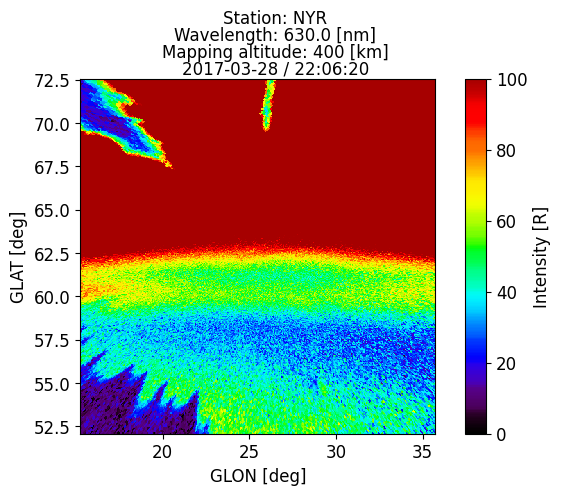

In [26]:
from ergpyspedas.erg import plot_omti_gmap
plt.rcParams["font.size"] = 12
plot_omti_gmap( 'omti_asi_nyr_6300_image_abs_gmap_400', time = pytplot.time_double('2017-03-28/22:07:00'), z_min= 0, z_max= 100)

 #### 3.3.5 Overplot several observation data on the world map

12-Sep-24 14:19:22: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/
12-Sep-24 14:19:23: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170328_v04.cdf
12-Sep-24 14:19:23: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmplggshvg3.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:19:23: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpqzn2ji63.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)



 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


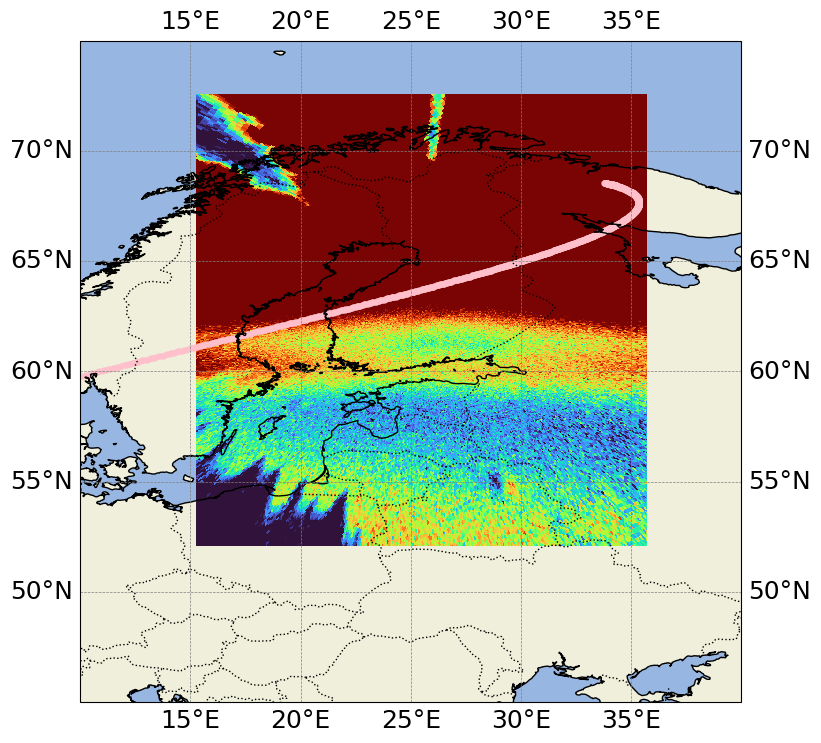

In [27]:
import pytplot
from ergpyspedas.erg import orb

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

tr = ['2017-03-28/22:00', '2017-03-28/23:00']
orb = orb(trange = tr)
pytplot.split_vec('erg_orb_l2_pos_iono_north')
erg_ft_glat = pytplot.get_data('erg_orb_l2_pos_iono_north_0')
erg_ft_glon = pytplot.get_data('erg_orb_l2_pos_iono_north_1')

omti_map_data = pytplot.get_data('omti_asi_nyr_6300_image_abs_gmap_400')
img_attrs = pytplot.get_data('omti_asi_nyr_6300_image_abs_gmap_400', metadata=True)
omti_map_glon = img_attrs['pos'][0]
omti_map_glat = img_attrs['pos'][1]
count_data = np.transpose(omti_map_data.y[0])

fig = plt.figure(figsize=(294/25.4, 210/25.4))
ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.PlateCarree())
# ---
# If you want to draw other maps, you should replace 6 line by the following lines.
# Many projections are prepared in the cartopy library
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.Mercator())
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.Robinson())
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.LambertCylindrical())
# ax = fig.add_axes([0.10, 0.10, 0.80, 0.80], projection=ccrs.LambertConformal())

# --- Set draw range of longitude and latitude.
ax.set_extent([10, 40, 45, 75], crs=ccrs.PlateCarree())

# --- Draw coast lines with high resolution (10m interval).
ax.coastlines(resolution='10m', color='black', linewidth=1)

# --- Add color in the land.
ax.add_feature(cfeature.LAND)

# --- Add color in the ocean.
ax.add_feature(cfeature.OCEAN)

# --- Draw borders with the dotted line.
ax.add_feature(cfeature.BORDERS, linestyle=':')

# --- Draw lakes.
#ax.add_feature(cfeature.LAKES)

# --- Draw rivers.
#ax.add_feature(cfeature.RIVERS)

# --- Plot the OMTI image data.
ax.pcolormesh(omti_map_glon, omti_map_glat, count_data, cmap=plt.cm.turbo, norm=Normalize(vmin=20, vmax=80), transform=ccrs.PlateCarree())

# Plot the footprint of Arase orbit  at an altitude of the ionosphere.
ax.scatter(erg_ft_glon.y,erg_ft_glat.y, transform=ccrs.PlateCarree(), marker='.', color= 'pink',  s= 50)

# --- Draw the grid lines of latitude and longitude.
ax.gridlines(linestyle='dashed', color='gray', linewidth=0.5,  draw_labels=True)

# --- Set font size for all labels.
plt.rcParams["font.size"] = 18

plt.show()

-----------------
# Beginner and advanced courses
-----------------
## 4. Load Arase satellite data
Let's analyze and plot Arase satellite data during the SAR arc event reported by Inaba et al. [2020].

In [28]:
from pyspedas.erg import pwe_hfa, pwe_ofa, pwe_efd, mgf, xep, hep, mepe, lepe, mepi_nml, lepi, orb             #Import several modules from pyspedas.erg.
tr=['2017-03-28 21:00:00', '2017-03-28 24:00:00']                                                              # Set time range to load Arase data.
ID = 'erg_project'                                                                                             # Set ID for downloading Arase data.
pw = 'geospace'                                                                                                # Set password for downloading Arase data.
pwe_hfa( trange=tr, datatype='spec', uname = ID, passwd = pw )                                                 # PWE_HFA  (The defaults are mode:low and level:l2)
pwe_hfa( trange=tr, datatype='spec', mode = 'high', uname = ID, passwd = pw )                                  # PWE_HFA  (The defaults are mode:High and level:l2)
pwe_hfa( trange=tr, datatype='spec', level = 'l3', uname = ID, passwd = pw )                                   # PWE_HFA L3 (electron density) data.
pwe_ofa( trange=tr, datatype='spec', uname = ID, passwd = pw )                                                 # PWE_OGA  (The default is level:l2)
pwe_efd( trange=tr, datatype='spec', uname = ID, passwd = pw )                                                 # PWE_EFD  (The default is level:l2)
mgf( trange=tr, uname = ID, passwd = pw )                                                                      # MGF
xep( trange=tr, datatype='omniflux', uname = ID, passwd = pw )                                                 # XEP
hep( trange=tr, datatype='omniflux', uname = ID, passwd = pw )                                                 # HEP
mepe( trange=tr, datatype='omniflux', uname = ID, passwd = pw )                                                # MEP-e
lepe( trange=tr, datatype='omniflux', uname = ID, passwd = pw )                                                # LEP-e
mepi_nml( trange=tr, datatype='omniflux', uname = ID, passwd = pw )                                            # MEP-i
lepi( trange=tr, datatype='omniflux', uname = ID, passwd = pw )                                                # LEP-i


12-Sep-24 14:23:25: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/hfa/l2/spec/low/2017/03/
12-Sep-24 14:23:25: File is current: erg_data/satellite/erg/pwe/hfa/l2/spec/low/2017/03/erg_pwe_hfa_l2_spec_low_20170328_v01_02.cdf
12-Sep-24 14:23:26: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpj1sxwx5_.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:23:27: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpjewh9n0x.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:23:27: Variable spectra_eu_ev DEPEND_1 attribute complex_label has length 2, but corresponding data dimension has length 479. Removing attribute.
12-Sep-24 14:23:27: Variabl

 
 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Electric Field Data (HFA) Level 2 spectrum data']

Information about ERG PWE HFA

PI:  ['Yoshiya Kasahara']
Affiliation:  ['Kanazawa University']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/HFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Hfa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:23:28: File is current: erg_data/satellite/erg/pwe/hfa/l2/spec/high/2017/03/erg_pwe_hfa_l2_spec_high_20170328_v01_02.cdf
12-Sep-24 14:23:36: Variable spectra_eu_ev DEPEND_1 attribute complex_label has length 2, but corresponding data dimension has length 479. Removing attribute.
12-Sep-24 14:23:36: Variable spectra_eu_ev DEPEND_2 attribute freq_spec has length 479, but corresponding data dimension has length 2. Removing attribute.
12-Sep-24 14:23:37: Variable spectra_eu_bg DEPEND_1 attribute complex_label has length 2, but corresponding data dimension has length 479. Removing attribute.
12-Sep-24 14:23:37: Variable spectra_eu_bg DEPEND_2 attribute freq_spec has length 479, but corresponding data dimension has length 2. Removing attribute.
12-Sep-24 14:23:37: Variable spectra_ev_bg DEPEND_1 attribute complex_label has length 2, but corresponding data dimension has length 479. Removing attribute.
12-Sep-24 14:23:37: Variable spectra_ev_bg DEPEND_2 attribute freq_spec has len

 
 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Electric Field Data (HFA) Level 2 spectrum data']

Information about ERG PWE HFA

PI:  ['Yoshiya Kasahara']
Affiliation:  ['Kanazawa University']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/HFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Hfa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:23:39: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmp2bgqd6pg.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:23:39: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpm3_ekkg8.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:23:39: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2017/03/


 
 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) High Frequency Analyzer (HFA) Level 3 UHR frequency and electron density data']

Information about ERG PWE HFA

PI:  ['Yoshiya Kasahara and Ayako Matsuoka']
Affiliation:  ['Kanazawa University and Kyoto University']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/HFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Hfa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:23:39: File is current: erg_data/satellite/erg/pwe/ofa/l2/spec/2017/03/erg_pwe_ofa_l2_spec_20170328_v02_03.cdf
12-Sep-24 14:23:40: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpab83ytuv.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:23:41: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmp385v8y7g.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:23:42: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/efd/l2/spec/2017/03/


 
 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data']

Information about ERG PWE OFA

PI:  ['Yoshiya Kasahara']
Affiliation:  ['Kanazawa University']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:23:42: File is current: erg_data/satellite/erg/pwe/efd/l2/spec/2017/03/erg_pwe_efd_l2_spec_20170328_v02_03.cdf
12-Sep-24 14:23:43: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Sep-24 14:23:43: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170328_v03.04.cdf


 
 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Electric Field Data (EFD) Level 2 spectrum data']

Information about ERG PWE EFD

PI:  ['Yoshiya Kasahara']
Affiliation:  ['Kanazawa University']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/EFD: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Efd

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:23:43: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/xep/l2/omniflux/2017/03/
12-Sep-24 14:23:43: File is current: erg_data/satellite/erg/xep/l2/omniflux/2017/03/erg_xep_l2_omniflux_20170328_v01_00.cdf


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
Affiliation:  ['Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:23:43: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpze5rjiex.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:23:43: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmp265zhknw.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:23:43: Variable FEDO_SSD is 2-dimensional, but first dimension of DEPEND_1 attribute FEDO_SSD_Energy has size 2 versus num_times 10810. Attribute will be kept (for now).
12-Sep-24 14:23:43: Variable FEDO_GSO is 2-dimensional, but first dimension of DEPEND_1 attribute FEDO_GSO_Energy has size 2 versus num_times 10810. Attribute will be kept (for now).
12-Sep-24 14:23:43: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: R

 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Extremely High-Energy Electron Experiment (XEP) Level 2 extremely high energy electron data']

Information about ERG XEP

PI:  ['Nana Higashio']
Affiliation:  ['Space Environment Group, Aerospace Research and Development Directorate, Tsukuba Space Center, Japan Aerospace Exploration Agency, 2-1-1 Sengen, Tsukuba, Ibaraki 305-8505, Japan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of XEP: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Xep

Contact: erg_xep_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:23:44: File is current: erg_data/satellite/erg/hep/l2/omniflux/2017/03/erg_hep_l2_omniflux_20170328_v03_01.cdf
12-Sep-24 14:23:44: Variable FEDO_L is 2-dimensional, but first dimension of DEPEND_1 attribute FEDO_L_Energy has size 2 versus num_times 10828. Attribute will be kept (for now).
12-Sep-24 14:23:44: Variable FEDO_H is 2-dimensional, but first dimension of DEPEND_1 attribute FEDO_H_Energy has size 2 versus num_times 10813. Attribute will be kept (for now).
12-Sep-24 14:23:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/omniflux/2017/03/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) High-energy electron experiments (HEP) Level-2 omni flux data']

PI:  ['Takefumi Mitani']
Affiliation:  ['ISAS, JAXA']

- The rules of the road (RoR) common to the ERG project:
       https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for HEP data: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Hep

Contact: erg_hep_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:23:44: File is current: erg_data/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170328_v01_02.cdf
12-Sep-24 14:23:44: Variable FEDO has only 2 dimensions (including time), but has a DEPEND_2 attribute. Removing attribute.
12-Sep-24 14:23:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepe/l2/omniflux/2017/03/
12-Sep-24 14:23:44: File is current: erg_data/satellite/erg/lepe/l2/omniflux/2017/03/erg_lepe_l2_omniflux_20170328_v04_01.cdf


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - electron analyzer (MEP-e) electron omni flux data']

PI:  ['Satoshi Kasahara']
Affiliation:  ['The University of Tokyo']

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-e data:  https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepe

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:23:44: Variable FEDO DEPEND_1 attribute FEDO_Energy has too many dimensions (3). Keeping extra dimensions (for now).
12-Sep-24 14:23:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepi/l2/omniflux/2017/03/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Low-Energy Particle experiments - electron analyzer (LEP-e) Level 2 omni electron flux data']

Information about ERG LEPe

PI:  ['Shiang-Yu Wang']
Affiliation:  ['Academia Sinica, Taiwan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of LEPe L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Lepe

Contact: erg_lepe_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:23:45: File is current: erg_data/satellite/erg/mepi/l2/omniflux/2017/03/erg_mepi_l2_omniflux_20170328_v02_01.cdf
12-Sep-24 14:23:45: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepi/l2/omniflux/2017/03/
12-Sep-24 14:23:45: Remote index not found: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepi/l2/omniflux/2017/03/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - ion mass analyzer (MEP-i) 3D ion omni flux data']

PI:  ['Shoichiro Yokota']
Affiliation:  ['Osaka University']

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-i data: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepi

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


[]

In [29]:
vars = pytplot.tplot_names()

0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm
19 : erg_mgf_l2_mag_8sec_sm-d
20 : erg_mgf_l2_mag_8sec_sm-m
21 : erg_mgf_l2_mag_8sec_sm_x
22 : erg_mgf_l2_mag_8sec_sm_y
23 : erg_mgf_l2_mag_8sec_sm_z
24 : erg_mgf_l2_mag_8sec_sm_join
25 : erg_mgf_l2_mag_8sec_sm_x_dpwrspc
26 : erg_mgf_l2_mag_8sec_sm_y_dpwrspc
27 : erg_mgf_l2_mag_8sec_sm_z_dpwrspc
28 : erg_pwe_ofa_l2_spec_epoch_e132
29 : erg_pwe_ofa_l2_spec_E_spectra_132
30 : erg_pwe_ofa_l2_spec_quality_flag_e132
31 : erg_pwe_ofa_l2_spec_epoch_b132
32 : erg_

 ### 4.1 Plot loaded Arase data

12-Sep-24 14:24:51: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:24:51: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:24:51: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:24:51: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:24:51: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:24:51: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:24:51: get_bin_boundaries: may contain nans between finite values. To

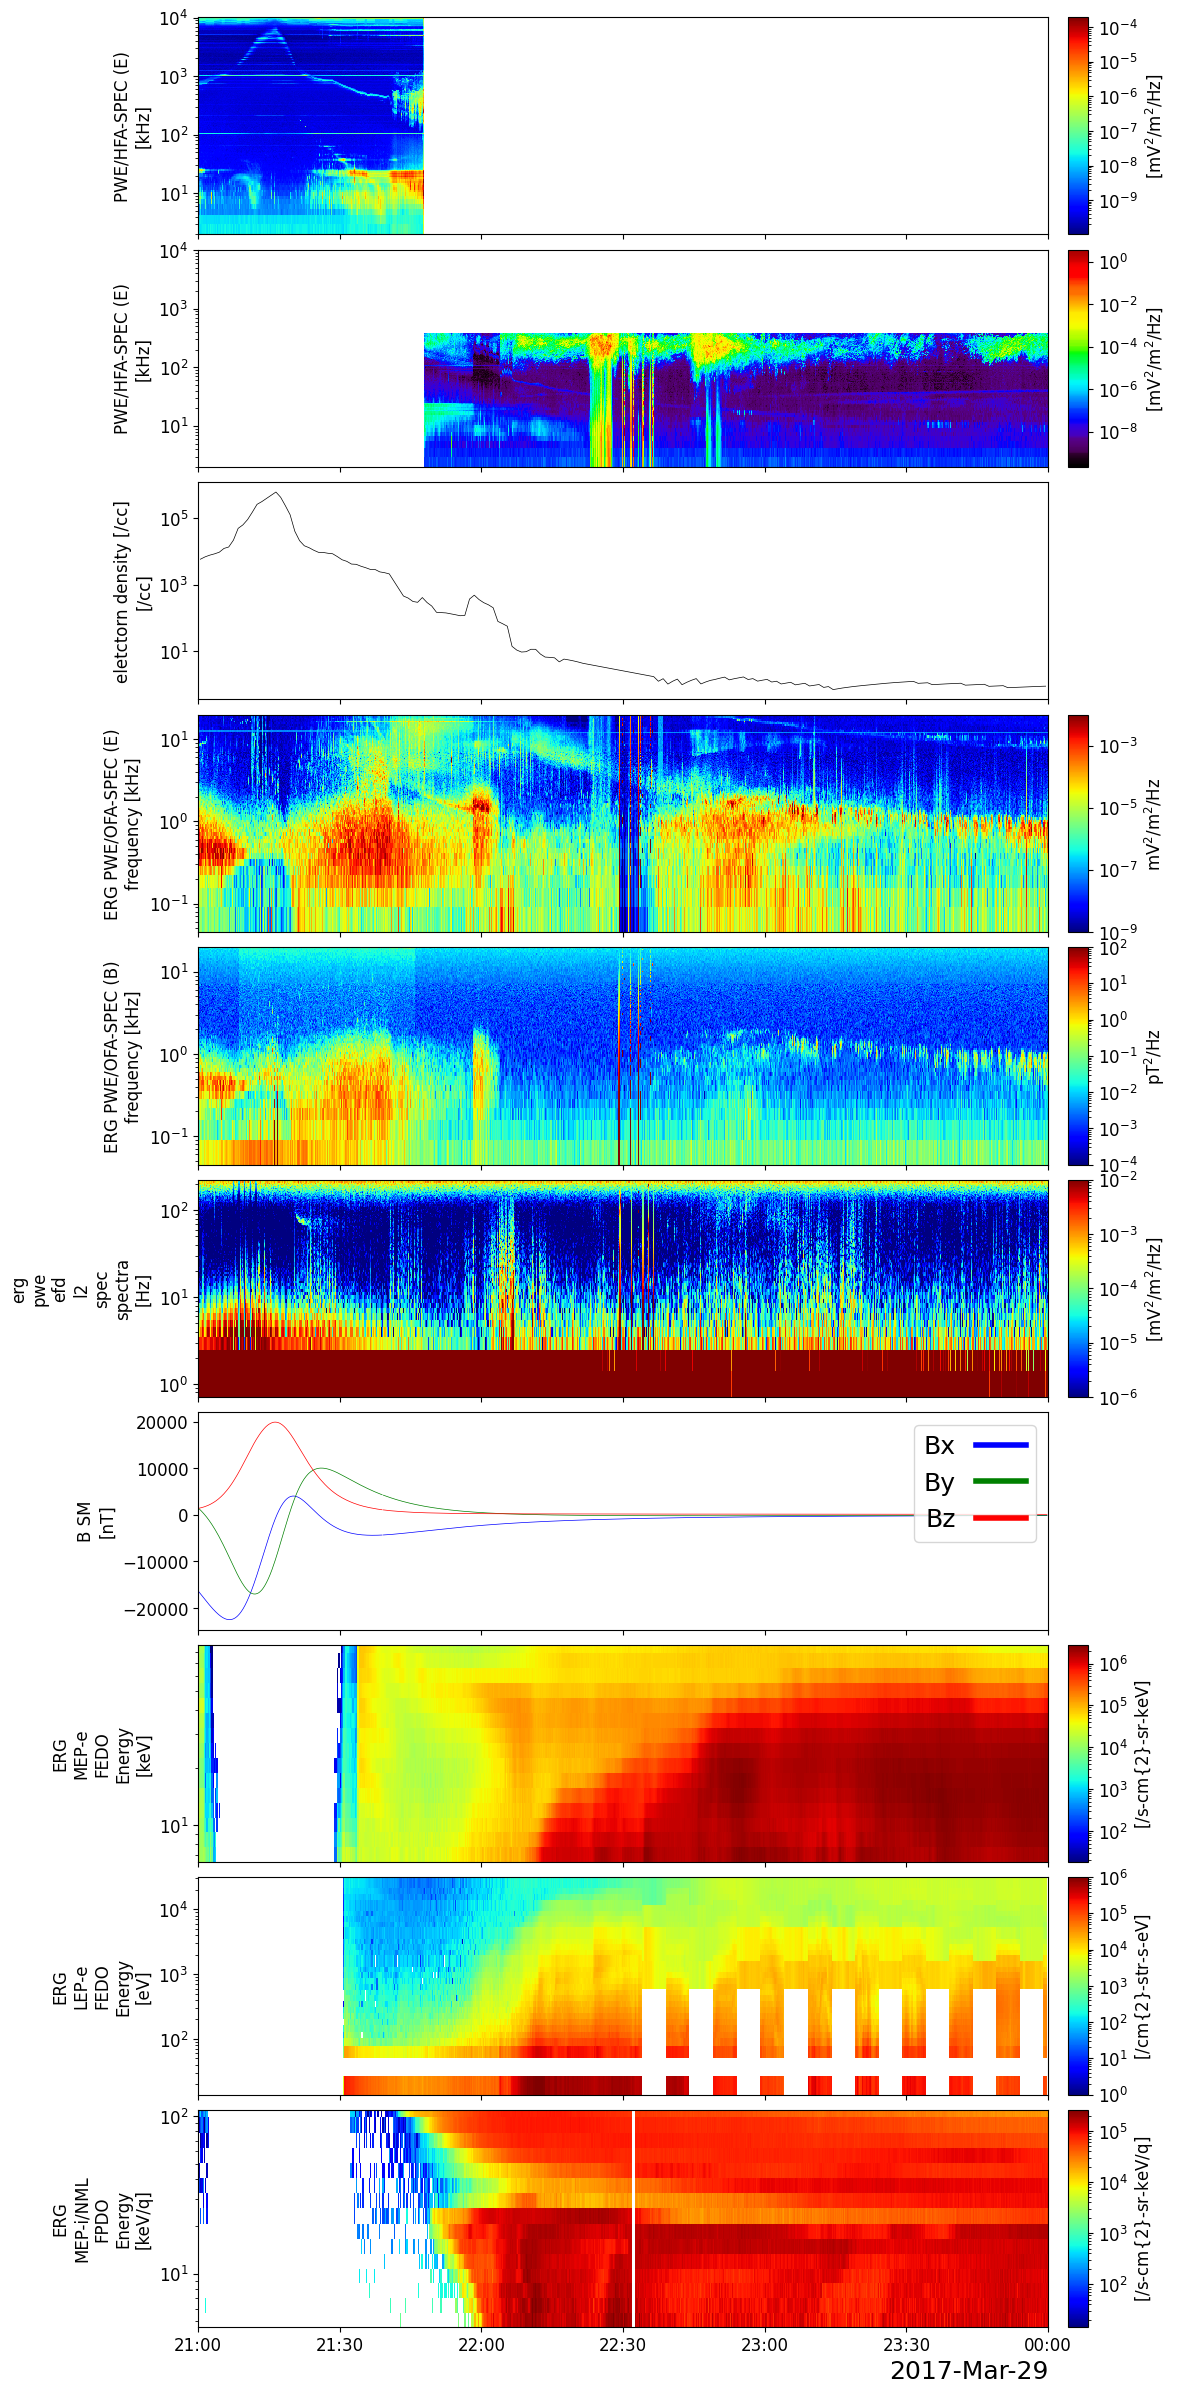

In [30]:
#For usage of google colab.
pytplot.options(['erg_pwe_hfa_l2_low_spectra_e_mix', 'erg_pwe_hfa_l2_high_spectra_e_mix','erg_pwe_ofa_l2_spec_E_spectra_132', 'erg_pwe_ofa_l2_spec_B_spectra_132', 'erg_pwe_efd_l2_spec_spectra', 'erg_mgf_l2_mag_8sec_sm', 'erg_mepe_l2_omniflux_FEDO', 'erg_lepe_l2_omniflux_FEDO', 'erg_mepi_l2_omniflux_FPDO'], 'x_no_resample', 1)
pytplot.options(['erg_pwe_hfa_l2_low_spectra_e_mix', 'erg_pwe_hfa_l2_high_spectra_e_mix', 'erg_pwe_ofa_l2_spec_E_spectra_132', 'erg_pwe_ofa_l2_spec_B_spectra_132', 'erg_pwe_efd_l2_spec_spectra', 'erg_mgf_l2_mag_8sec_sm', 'erg_mepe_l2_omniflux_FEDO', 'erg_lepe_l2_omniflux_FEDO', 'erg_mepi_l2_omniflux_FPDO'], 'y_no_resample', 1)

#Set the option of data gap with 60 seconds.
pytplot.options(['erg_pwe_hfa_l2_low_spectra_e_mix', 'erg_pwe_hfa_l2_high_spectra_e_mix','erg_pwe_ofa_l2_spec_E_spectra_132', 'erg_pwe_ofa_l2_spec_B_spectra_132', 'erg_pwe_efd_l2_spec_spectra', 'erg_mgf_l2_mag_8sec_sm', 'erg_mepe_l2_omniflux_FEDO', 'erg_lepe_l2_omniflux_FEDO', 'erg_mepi_l2_omniflux_FPDO'], 'data_gap', 60.0)

# --- Set time span to plot data.
pytplot.timespan('2017-03-28 21:00:00', 3, keyword='hours')

# --- Set font size for all labels.
#plt.rcParams["font.size"] = 8

#Plot all the data with x and ysizes of 10 and 30, respectively.
tplot(['erg_pwe_hfa_l2_low_spectra_e_mix','erg_pwe_hfa_l2_high_spectra_e_mix','erg_pwe_hfa_l3_1min_ne_mgf', 'erg_pwe_ofa_l2_spec_E_spectra_132', 'erg_pwe_ofa_l2_spec_B_spectra_132', 'erg_pwe_efd_l2_spec_spectra', 'erg_mgf_l2_mag_8sec_sm', 'erg_mepe_l2_omniflux_FEDO', 'erg_lepe_l2_omniflux_FEDO', 'erg_mepi_l2_omniflux_FPDO'], xsize = 10, ysize = 30)

### 4.2 Change the color bar for F-t and E-t diagrams

12-Sep-24 14:30:38: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:30:38: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:30:38: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:30:38: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:30:38: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:30:38: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:30:38: get_bin_boundaries: may contain nans between finite values. To

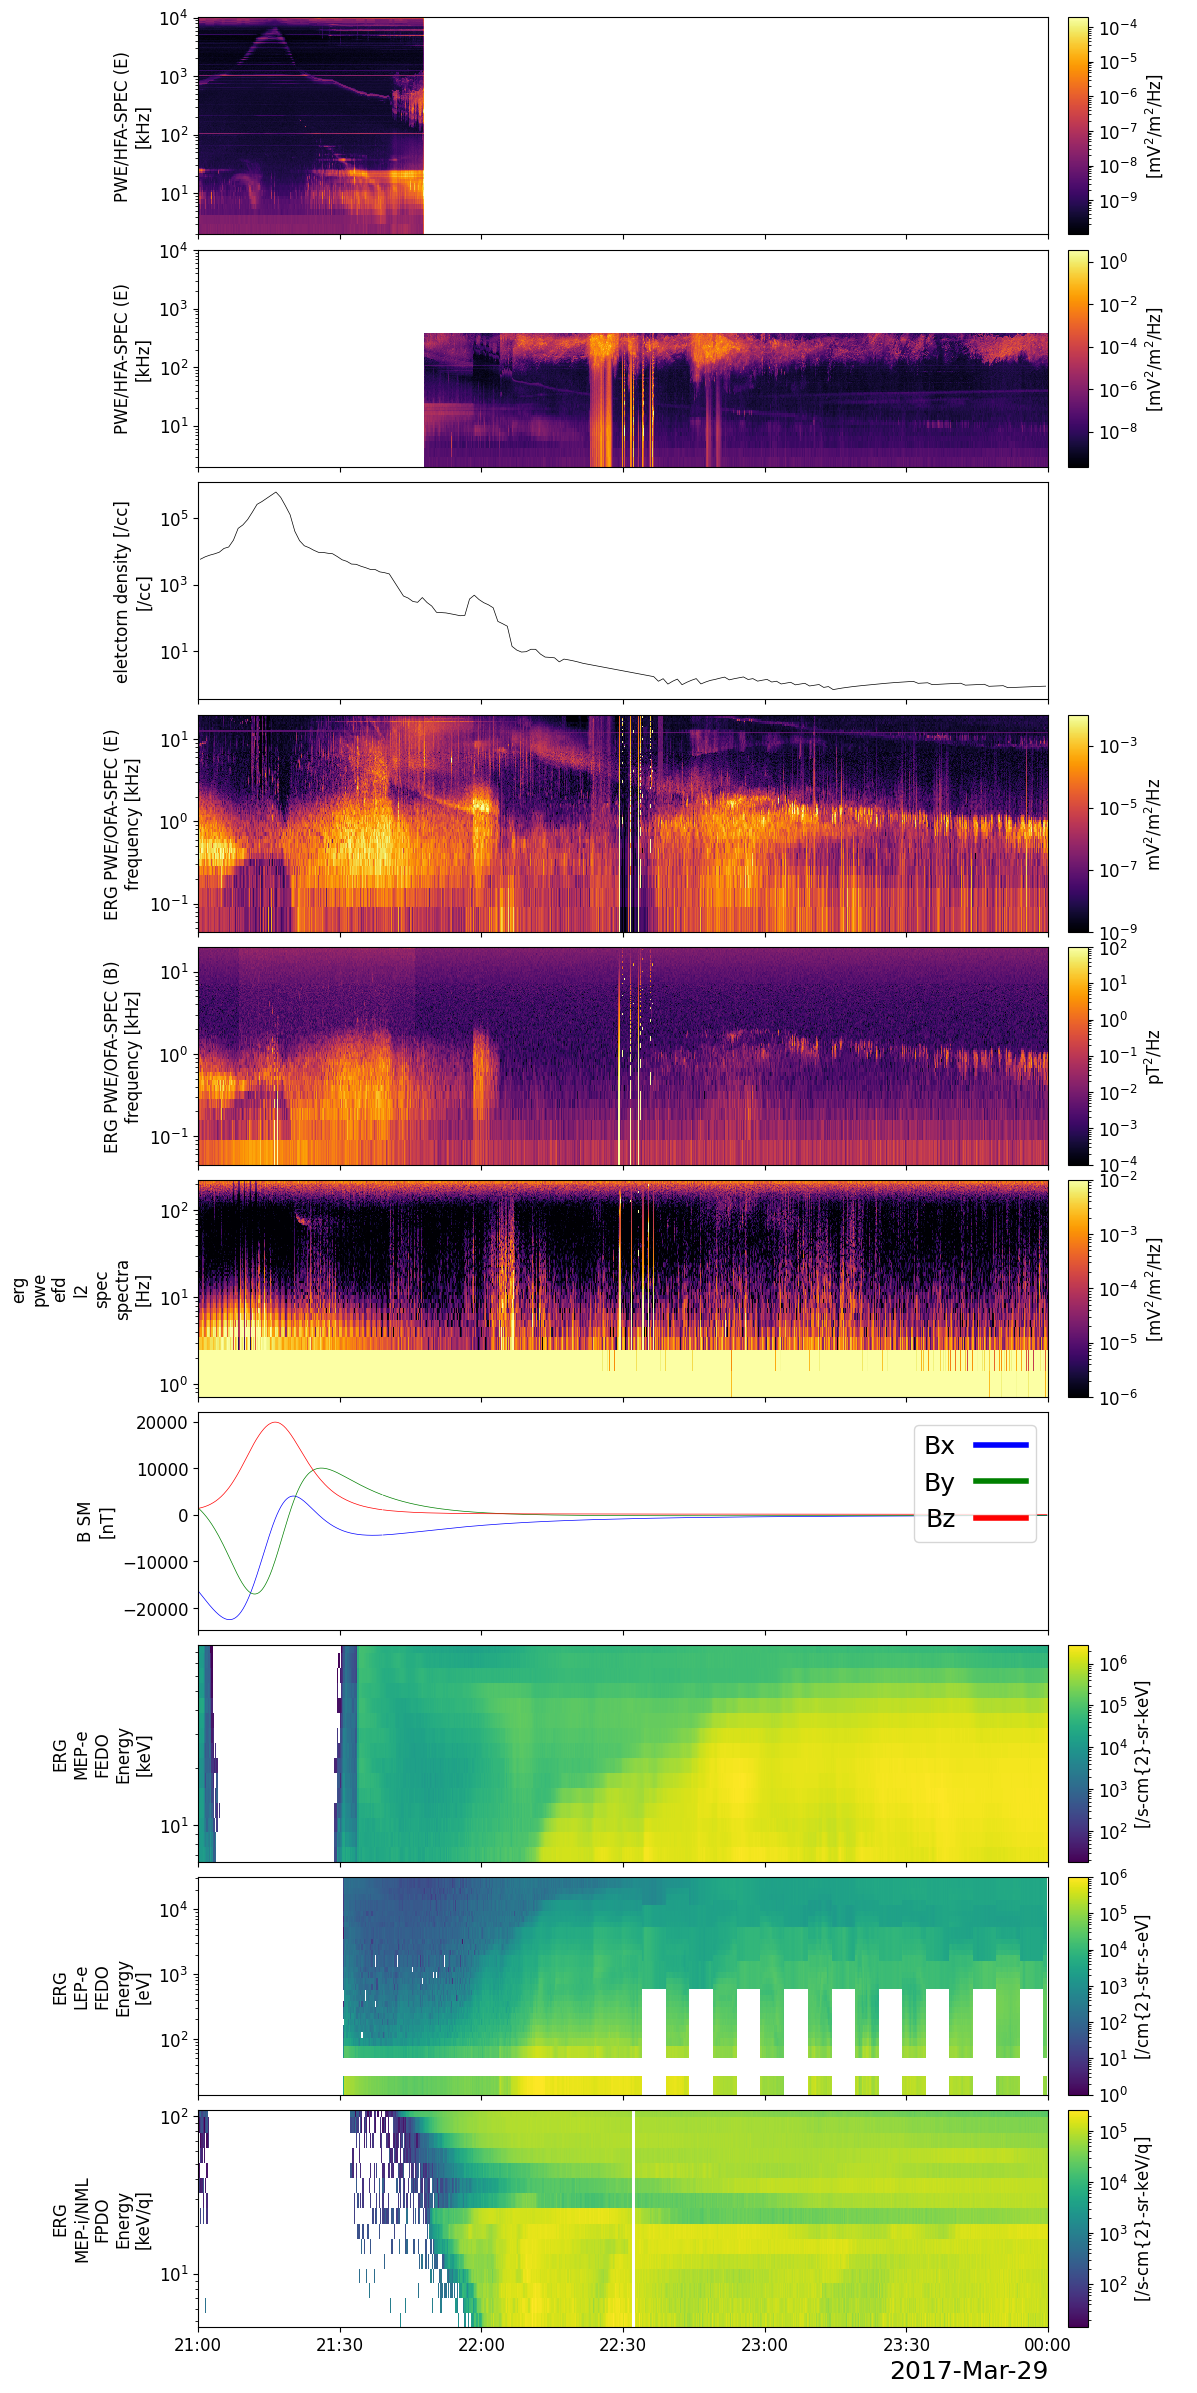

In [31]:
pytplot.options('erg_pwe_hfa_l2_low_spectra_e_mix', 'colormap', 'inferno')       #Chage the colormap for HFA data again.
pytplot.options('erg_pwe_hfa_l2_high_spectra_e_mix', 'colormap', 'inferno')       #Chage the colormap for HFA data again.
pytplot.options('erg_pwe_ofa_l2_spec_E_spectra_132', 'colormap', 'inferno' )     #Chage the colormap for OFA-E data again.
pytplot.options('erg_pwe_ofa_l2_spec_B_spectra_132', 'colormap', 'inferno' )     #Chage the colormap for OFA-B data again.
pytplot.options('erg_pwe_efd_l2_spec_spectra', 'colormap', 'inferno' )           #Chage the colormap for EFD-Spectrum data again.
pytplot.options('erg_mepe_l2_omniflux_FEDO', 'colormap', 'viridis' )             #Chage the colormap for MEP-e data again.
pytplot.options('erg_mepi_l2_omniflux_FPDO', 'colormap', 'viridis' )             #Chage the colormap for MEP-i data again.
pytplot.options('erg_lepe_l2_omniflux_FEDO', 'colormap', 'viridis' )             #Chage the colormap for LEP-e data again.

#Plot all the data with x and ysizes of 10 and 30, respectively.
tplot(['erg_pwe_hfa_l2_low_spectra_e_mix', 'erg_pwe_hfa_l2_high_spectra_e_mix', 'erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132', 'erg_pwe_ofa_l2_spec_B_spectra_132', 'erg_pwe_efd_l2_spec_spectra', 'erg_mgf_l2_mag_8sec_sm', 'erg_mepe_l2_omniflux_FEDO', 'erg_lepe_l2_omniflux_FEDO', 'erg_mepi_l2_omniflux_FPDO'], xsize = 10, ysize = 30)

### 4.3 Add some extra Xaxes to the bottom of the plot

12-Sep-24 14:32:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Sep-24 14:32:45: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170328_v03.04.cdf
12-Sep-24 14:32:45: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpl89v097i.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:32:45: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpd6jmmnq_.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:32:45: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
printing PI info and rules of the road was failed


12-Sep-24 14:32:45: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170328_v04.cdf
12-Sep-24 14:32:45: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmp5hit9x3t.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:32:45: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpnzqgx1i9.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:32:46: C:\Users\shinb\pyspedas\lib\site-packages\pytplot\MPLPlotter\tplot.py:712: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is

 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:32:46: C:\Users\shinb\pyspedas\lib\site-packages\pytplot\MPLPlotter\tplot.py:712: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  out_ticks.append('{:.2f}'.format(var_xr.interp(coords={'time': time}, kwargs={'fill_value': 'extrapolate', 'bounds_error': False}).values))

12-Sep-24 14:32:46: C:\Users\shinb\pyspedas\lib\site-packages\pytplot\MPLPlotter\tplot.py:712: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-n

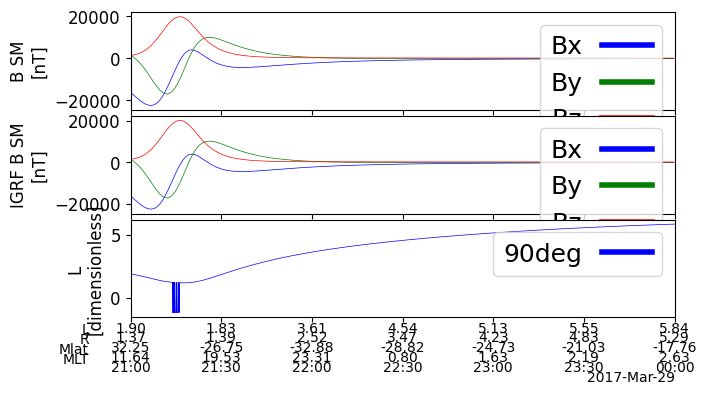

In [32]:
from ergpyspedas.erg import mgf, orb

pytplot.timespan( '2017-03-28 21:00:00', 3, keyword='hours')
tr=['2017-03-28 21:00:00', '2017-03-28 24:00:00']
#tr=['2017-03-30 00:00:00', '2017-03-30 24:00:00']

mgf(trange = tr)
orb(trange = tr)
#from pytplot import tplot_options, options, tplot_names, split_vec, get_data, tplot_opt_glob, tnames
from pytplot import options, tplot_names, split_vec, get_data, tplot_opt_glob, tnames

split_vec('erg_orb_l2_pos_rmlatmlt')
split_vec('erg_orb_l2_pos_Lm')
options('erg_orb_l2_pos_rmlatmlt_x', 'ytitle', 'R')
options('erg_orb_l2_pos_rmlatmlt_y', 'ytitle', 'Mlat')
options('erg_orb_l2_pos_rmlatmlt_z', 'ytitle', 'MLT')

var_label=['erg_orb_l2_pos_Lm_x', 'erg_orb_l2_pos_rmlatmlt_x','erg_orb_l2_pos_rmlatmlt_y','erg_orb_l2_pos_rmlatmlt_z']
plot_vars=['erg_mgf_l2_mag_8sec_sm','erg_mgf_l2_igrf_8sec_sm','erg_orb_l2_pos_Lm_x']

from ergpyspedas.util import tplot_vl
fig = tplot_vl(plot_vars, var_label=var_label)

12-Sep-24 14:43:15: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:43:15: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:43:15: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:43:15: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:43:15: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:43:15: get_bin_boundaries: may contain nans between finite values. Total bin count: 32,  leading nans: 1, trailing_nans: 0, finite vals: 30
12-Sep-24 14:43:15: get_bin_boundaries: may contain nans between finite values. To

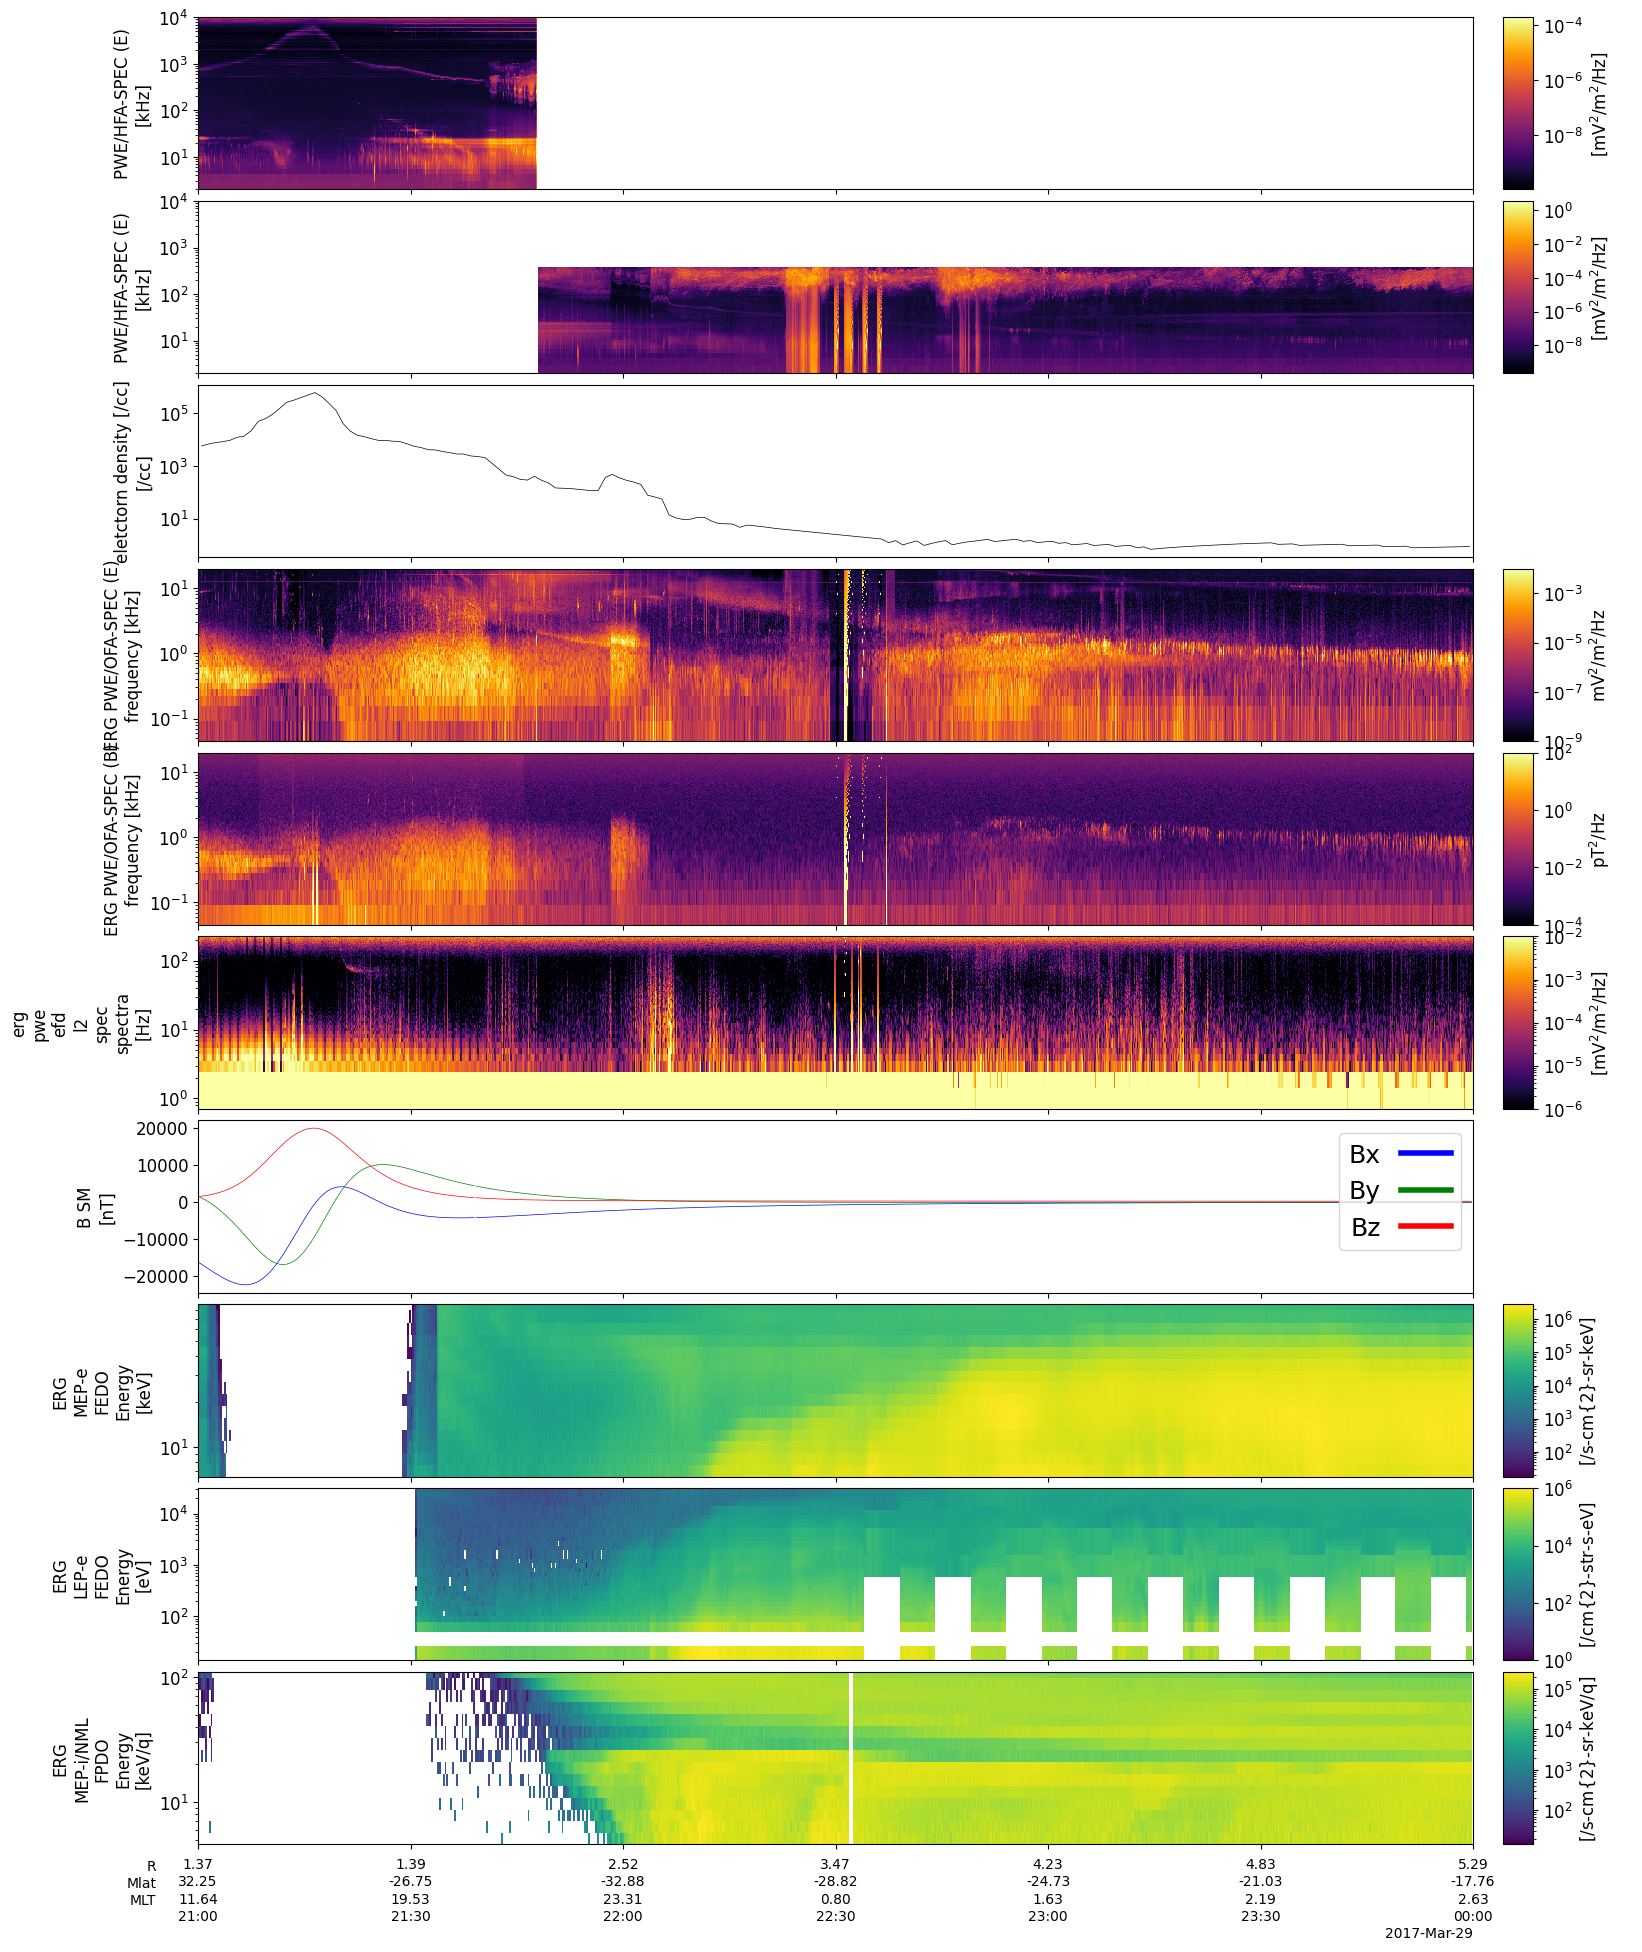

In [33]:
#Plot all the data.
from pytplot import options, tplot_names, split_vec, get_data, tplot_opt_glob, tnames
from ergpyspedas.util import tplot_vl

var_label=['erg_orb_l2_pos_rmlatmlt_x','erg_orb_l2_pos_rmlatmlt_y','erg_orb_l2_pos_rmlatmlt_z']

plot_vars=['erg_mgf_l2_mag_8sec_sm','erg_mgf_l2_igrf_8sec_sm','erg_orb_l2_pos_Lm_x']

fig = plt.figure(figsize=(15, 25))
fig = tplot_vl(['erg_pwe_hfa_l2_low_spectra_e_mix', 'erg_pwe_hfa_l2_high_spectra_e_mix', 'erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132', 'erg_pwe_ofa_l2_spec_B_spectra_132', 'erg_pwe_efd_l2_spec_spectra', 'erg_mgf_l2_mag_8sec_sm', 'erg_mepe_l2_omniflux_FEDO', 'erg_lepe_l2_omniflux_FEDO', 'erg_mepi_l2_omniflux_FPDO'], fig=fig, var_label=var_label)

In [34]:
orb( trange=['2017-03-28 21:00:00', '2017-03-24 00:00:00'])                      #Load Arase orbit data.
labels = pytplot.split_vec( 'erg_orb_l2_pos_rmlatmlt' )                          #Select label data to show at a bottom plot.
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_x', 'ytitle', 'R [Re]' )               #Set title of altitude data.
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_y', 'ytitle', 'MLat [deg]' )           #Set title of magnetic latitude data.
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_z', 'ytitle', 'MLT [h]' )              #Set title of magnetic local time data.

12-Sep-24 14:43:22: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/
12-Sep-24 14:43:22: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170328_v04.cdf
12-Sep-24 14:43:22: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmp__4_3uib.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:43:22: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpo1_3y6gd.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)



 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


### 4.4 Remove tplot variables that have been loaded

In [35]:
pytplot.del_data( 'erg_*' )
vars = pytplot.tplot_names()

0 : fce
1 : fcp
2 : omti_asi_nyr_6300_epoch_image
3 : omti_asi_nyr_6300_exposure_time
4 : omti_asi_nyr_6300_image_raw
5 : omti_asi_nyr_6300_epoch_cloud
6 : omti_asi_nyr_cloud
7 : omti_asi_nyr_5725_epoch_image
8 : omti_asi_nyr_5725_exposure_time
9 : omti_asi_nyr_5725_image_raw
10 : omti_asi_nyr_5725_epoch_cloud
11 : omti_asi_nyr_6300_image_abs
12 : omti_asi_nyr_6300_gmap_table_400
13 : omti_asi_nyr_6300_image_abs_gmap_400


----
# Beginner and advanced courses
----
## 5. Use the part_products library to obtain particle spectra

An experimental version of the part_products library has just been implemented to the ERG-SC plug-in. So far only the bleeding-edge distribution of the plug-in contains the part_products. In near future, after fully tested, the ERG part_products will be merged to the main distribution of pySPEDAS.

As of Mar., 2022, the following modules are released experimentally:
- `erg_xep_part_products()`
- `erg_hep_part_products()`
- `erg_mep_part_products()`   for MEP-e and MEP-i Normal mode data
- `erg_lep_part_products()`     for LEP-e and LEP-i Normal mode data

They can be used with common arguments and options, similar to those of the (original) IDL version.  Several spectrum plots using part_products are demonstrated below to show how to use the library for Arase's particle data.



### 5.1 Generate a tplot variable containing energy-time spectra

In [36]:
# Load MEP-e Lv.2 3-D flux data
pytplot.timespan( '2017-03-28 21:00:00', 3, keyword='hours' )
mepe( trange=['2017-03-28 21:00:00', '2017-03-28 24:00:00'], datatype='3dflux' )


12-Sep-24 14:45:22: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/3dflux/2017/03/
12-Sep-24 14:45:22: File is current: erg_data/satellite/erg/mepe/l2/3dflux/2017/03/erg_mepe_l2_3dflux_20170328_v01_01.cdf
12-Sep-24 14:45:33: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpf4knzp2g.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:45:45: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpyxft2_cn.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)



 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Medium-Energy Particle experiments - electron analyzer (MEP-e) Level 2 3D electron flux data']

PI:  ['Satoshi Kasahara']
Affiliation:  ['The University of Tokyo']

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-e data:  https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepe

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_mepe_l2_3dflux_FEDU',
 'erg_mepe_l2_3dflux_FEDU_n',
 'erg_mepe_l2_3dflux_FEEDU',
 'erg_mepe_l2_3dflux_count_raw',
 'erg_mepe_l2_3dflux_spin_phase']

12-Sep-24 14:46:15: erg_mepe_l2_3dflux_FEDU is 45% done.
12-Sep-24 14:46:20: erg_mepe_l2_3dflux_FEDU is 96% done.


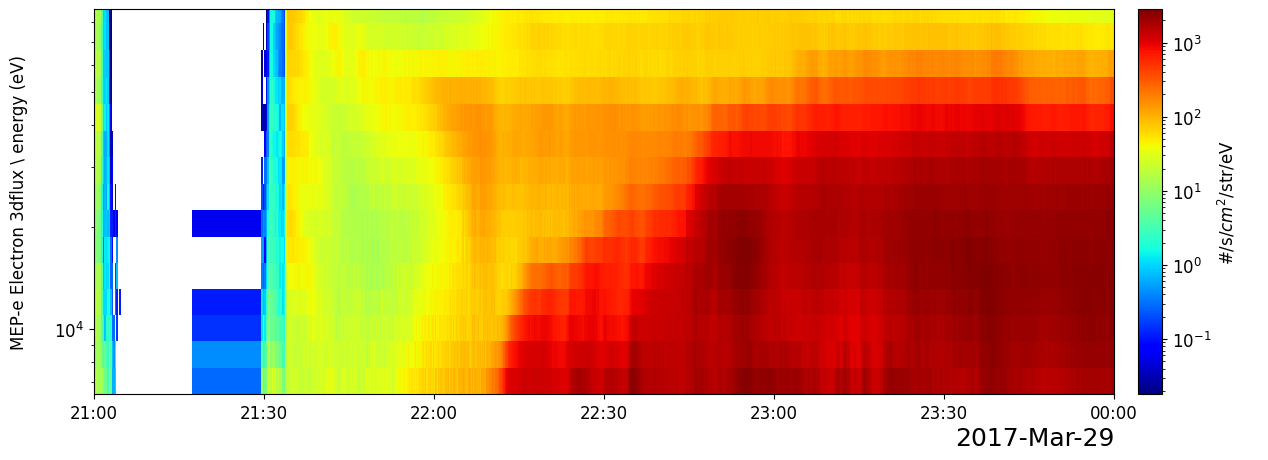

In [37]:
# Calculate energy-time spectra of the omni-dir. electron flux based on MEP-e data
from ergpyspedas.erg import erg_mep_part_products
vars = erg_mep_part_products( 'erg_mepe_l2_3dflux_FEDU', outputs='energy', trange=['2017-03-28 21:00:00', '2017-03-28 24:00:00'] )
pytplot.options('erg_mepe_l2_3dflux_FEDU_energy', 'x_no_resample', 1)
pytplot.options('erg_mepe_l2_3dflux_FEDU_energy', 'y_no_resample', 1)
tplot( 'erg_mepe_l2_3dflux_FEDU_energy' )


### 5.2 Calculate pitch-angle-time spectra of electron flux


12-Sep-24 14:47:23: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Sep-24 14:47:23: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170328_v03.04.cdf
12-Sep-24 14:47:23: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
printing PI info and rules of the road was failed


12-Sep-24 14:47:24: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170328_v04.cdf
12-Sep-24 14:47:24: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpgraufsuo.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:47:24: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmp0xz_c9jj.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:47:24: erg_mgf_l2_mag_8sec_dsi_shifted copied to erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
12-Sep-24 14:47:24: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
12-Sep-24 14:47:24: erg_orb_l2_pos_gse copied to erg_orb_l2_pos_gse_pgs_temp
12-Sep-24 14:47:24: tinterpol (linear) was applied to: erg_orb_l2_pos_gse_p

 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:47:29: erg_mepe_l2_3dflux_FEDU is 31% done.
12-Sep-24 14:47:34: erg_mepe_l2_3dflux_FEDU is 59% done.
12-Sep-24 14:47:39: erg_mepe_l2_3dflux_FEDU is 84% done.


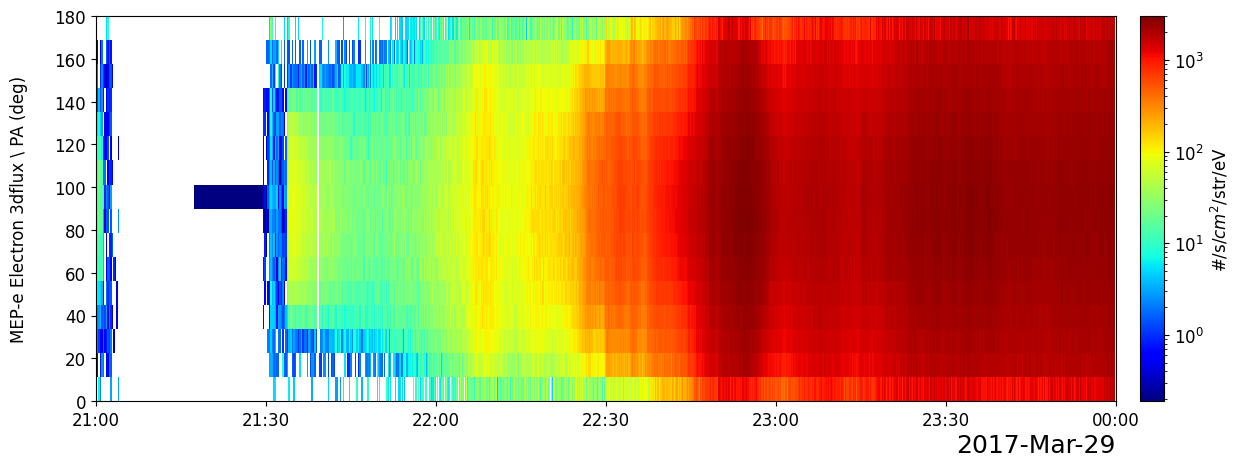

In [38]:
# Calculate pitch-angle-time spectra of electron flux based on MEP-e data

vars = mgf( trange=['2017-03-28 21:00:00', '2017-03-28 24:00:00'] ) # Load necessary B-field data
vars = orb( trange=['2017-03-28 21:00:00', '2017-03-28 24:00:00'] ) # Load necessary orbit data
mag_vn = 'erg_mgf_l2_mag_8sec_dsi'
pos_vn = 'erg_orb_l2_pos_gse'

vars = erg_mep_part_products( 'erg_mepe_l2_3dflux_FEDU', outputs='pa', energy=[15000., 22000.], fac_type='xdsi', mag_name=mag_vn, pos_name=pos_vn, trange=['2017-03-28 21:00:00', '2017-03-28 24:00:00'] )
pytplot.options('erg_mepe_l2_3dflux_FEDU_pa', 'x_no_resample', 1)
pytplot.options('erg_mepe_l2_3dflux_FEDU_pa', 'y_no_resample', 1)
tplot( 'erg_mepe_l2_3dflux_FEDU_pa' )


 ### 5.3 Calculate energy-time spectra of electron flux for limited pitch-angle (PA) ranges

12-Sep-24 14:48:55: erg_mgf_l2_mag_8sec_dsi_shifted copied to erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
12-Sep-24 14:48:55: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
12-Sep-24 14:48:55: erg_orb_l2_pos_gse copied to erg_orb_l2_pos_gse_pgs_temp
12-Sep-24 14:48:55: tinterpol (linear) was applied to: erg_orb_l2_pos_gse_pgs_temp
12-Sep-24 14:48:55: C:\Users\shinb\pyspedas\lib\site-packages\ergpyspedas\erg\satellite\erg\particle\erg_pgs_make_e_spec.py:30: RuntimeWarning: invalid value encountered in divide
  ave = data_array.sum(axis=1) / data['bins'].sum(axis=1)

12-Sep-24 14:49:00: erg_mepe_l2_3dflux_FEDU is 35% done.
12-Sep-24 14:49:05: erg_mepe_l2_3dflux_FEDU is 82% done.
12-Sep-24 14:49:07: erg_mgf_l2_mag_8sec_dsi_shifted copied to erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
12-Sep-24 14:49:07: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
12-Sep-24 14:49:07: erg_orb_l2_pos_gse copied to erg_orb_l2_pos_gse_pgs_temp
12-Sep-24 14

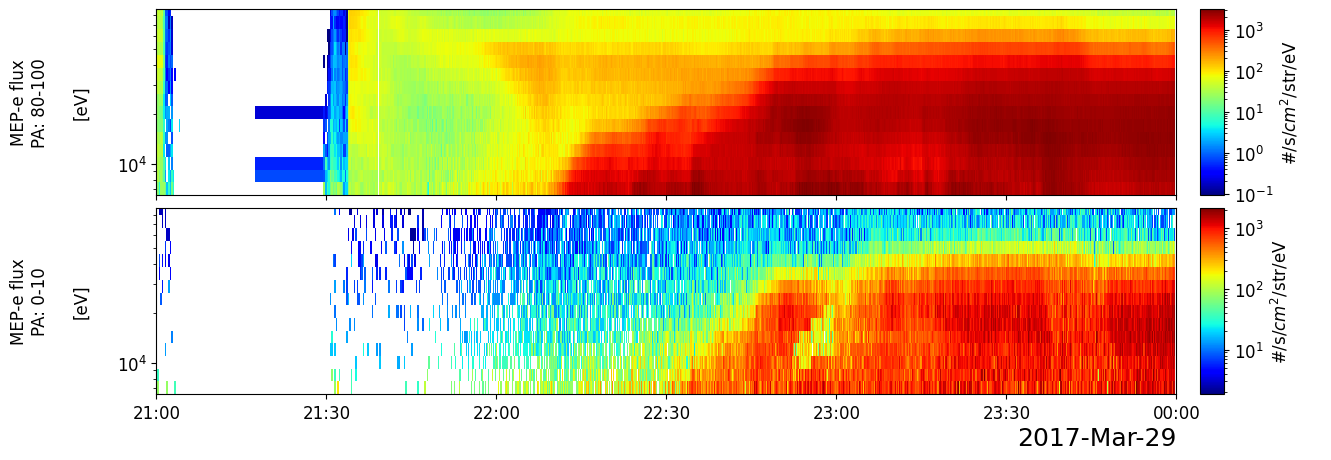

In [39]:
# Calculate energy-time spectra of electron flux for limited pitch-angle (PA) ranges

## Here we calculate energy-time spectra for PA = 0-10 deg and PA = 80-100 deg.
vars = erg_mep_part_products( 'erg_mepe_l2_3dflux_FEDU', outputs='fac_energy', pitch=[80., 100.], fac_type='xdsi', mag_name=mag_vn, pos_name=pos_vn, trange=['2017-03-28 21:00:00', '2017-03-28 24:00:00'], suffix='_pa80-100' )
vars = erg_mep_part_products( 'erg_mepe_l2_3dflux_FEDU', outputs='fac_energy', pitch=[0., 10.], fac_type='xdsi', mag_name=mag_vn, pos_name=pos_vn, trange=['2017-03-28 21:00:00', '2017-03-28 24:00:00'], suffix='_pa0-10' )

## Decorate the obtained spectrum variables
pytplot.options( 'erg_mepe_l2_3dflux_FEDU_energy_mag_pa80-100', 'ytitle', 'MEP-e flux\nPA: 80-100\n\n[eV]')
pytplot.options( 'erg_mepe_l2_3dflux_FEDU_energy_mag_pa0-10', 'ytitle', 'MEP-e flux\nPA: 0-10\n\n[eV]')

pytplot.options('erg_mepe_l2_3dflux_FEDU_energy_mag_pa80-100', 'x_no_resample', 1)
pytplot.options('erg_mepe_l2_3dflux_FEDU_energy_mag_pa80-100', 'y_no_resample', 1)
pytplot.options('erg_mepe_l2_3dflux_FEDU_energy_mag_pa0-10', 'x_no_resample', 1)
pytplot.options('erg_mepe_l2_3dflux_FEDU_energy_mag_pa0-10', 'y_no_resample', 1)

tplot( ['erg_mepe_l2_3dflux_FEDU_energy_mag_pa80-100', 'erg_mepe_l2_3dflux_FEDU_energy_mag_pa0-10' ] )

 ### 5.4 Derivation of the ion velocity moments from MEP-i proton data

In [40]:
# Derivation of the ion velocity moments from MEP-i proton data

## First load the necessary datasets
from pyspedas.erg import mgf, orb, mepi_nml, erg_mep_part_products
vars = mepi_nml( trange=['2017-03-28 21:00:00', '2017-03-28 24:00:00'], datatype='3dflux' ) # Load necessary B-field data
vars = mgf( trange=['2017-03-28 21:00:00', '2017-03-28 24:00:00'] ) # Load necessary B-field data
vars = orb( trange=['2017-03-28 21:00:00', '2017-03-28 24:00:00'] ) # Load necessary orbit data
mag_vn = 'erg_mgf_l2_mag_8sec_dsi'
pos_vn = 'erg_orb_l2_pos_gse'


12-Sep-24 14:50:23: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepi/l2/3dflux/2017/03/
12-Sep-24 14:50:23: File is current: erg_data/satellite/erg/mepi/l2/3dflux/2017/03/erg_mepi_l2_3dflux_20170328_v01_03.cdf
12-Sep-24 14:50:40: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - ion mass analyzer (MEP-i) Level-2 3D flux data']

PI:  ['Shoichiro Yokota']
Affiliation:  ['Osaka University']

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-i data: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepi

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:50:41: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170328_v03.04.cdf
12-Sep-24 14:50:41: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
Affiliation:  ['Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Sep-24 14:50:41: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170328_v04.cdf
12-Sep-24 14:50:41: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmp0joxc52c.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)

12-Sep-24 14:50:41: C:\Users\shinb\pyspedas\lib\site-packages\cdflib\cdfread.py:592: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shinb\\AppData\\Local\\Temp\\tmpu8my1h9w.cdf'>
  self.temp_file = Path(tempfile.NamedTemporaryFile(suffix=".cdf").name)



 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


In [41]:
## Calculate a set of velocity moments with the "part_products" library.
vars = erg_mep_part_products( 'erg_mepi_l2_3dflux_FPDU', outputs='moments', mag_name=mag_vn, pos_name=pos_vn, trange=['2017-03-28 21:00:00', '2017-03-28 24:00:00'])


12-Sep-24 14:51:12: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted
12-Sep-24 14:51:12: C:\Users\shinb\pyspedas\lib\site-packages\pyspedas\particles\moments\moments_3d.py:122: RuntimeWarning: invalid value encountered in divide
  velocity = flux/density/1e5 # km/s

12-Sep-24 14:51:15: erg_mepi_l2_3dflux_FPDU_eflux is currently not in pytplot.
12-Sep-24 14:51:15: erg_mepi_l2_3dflux_FPDU_eflux is currently not in pytplot.


In [42]:
pytplot.tplot_names()

0 : fce
1 : fcp
2 : omti_asi_nyr_6300_epoch_image
3 : omti_asi_nyr_6300_exposure_time
4 : omti_asi_nyr_6300_image_raw
5 : omti_asi_nyr_6300_epoch_cloud
6 : omti_asi_nyr_cloud
7 : omti_asi_nyr_5725_epoch_image
8 : omti_asi_nyr_5725_exposure_time
9 : omti_asi_nyr_5725_image_raw
10 : omti_asi_nyr_5725_epoch_cloud
11 : omti_asi_nyr_6300_image_abs
12 : omti_asi_nyr_6300_gmap_table_400
13 : omti_asi_nyr_6300_image_abs_gmap_400
14 : erg_mepe_l2_3dflux_FEDU
15 : erg_mepe_l2_3dflux_FEDU_n
16 : erg_mepe_l2_3dflux_FEEDU
17 : erg_mepe_l2_3dflux_count_raw
18 : erg_mepe_l2_3dflux_spin_phase
19 : erg_mepe_l2_3dflux_FEDU_energy
20 : erg_mgf_l2_epoch_8sec
21 : erg_mgf_l2_mag_8sec_dsi
22 : erg_mgf_l2_mag_8sec_gse
23 : erg_mgf_l2_mag_8sec_gsm
24 : erg_mgf_l2_mag_8sec_sm
25 : erg_mgf_l2_magt_8sec
26 : erg_mgf_l2_rmsd_8sec_dsi
27 : erg_mgf_l2_rmsd_8sec_gse
28 : erg_mgf_l2_rmsd_8sec_gsm
29 : erg_mgf_l2_rmsd_8sec_sm
30 : erg_mgf_l2_rmsd_8sec
31 : erg_mgf_l2_n_rmsd_8sec
32 : erg_mgf_l2_dyn_rng_8sec
33 : erg_m

['fce',
 'fcp',
 'omti_asi_nyr_6300_epoch_image',
 'omti_asi_nyr_6300_exposure_time',
 'omti_asi_nyr_6300_image_raw',
 'omti_asi_nyr_6300_epoch_cloud',
 'omti_asi_nyr_cloud',
 'omti_asi_nyr_5725_epoch_image',
 'omti_asi_nyr_5725_exposure_time',
 'omti_asi_nyr_5725_image_raw',
 'omti_asi_nyr_5725_epoch_cloud',
 'omti_asi_nyr_6300_image_abs',
 'omti_asi_nyr_6300_gmap_table_400',
 'omti_asi_nyr_6300_image_abs_gmap_400',
 'erg_mepe_l2_3dflux_FEDU',
 'erg_mepe_l2_3dflux_FEDU_n',
 'erg_mepe_l2_3dflux_FEEDU',
 'erg_mepe_l2_3dflux_count_raw',
 'erg_mepe_l2_3dflux_spin_phase',
 'erg_mepe_l2_3dflux_FEDU_energy',
 'erg_mgf_l2_epoch_8sec',
 'erg_mgf_l2_mag_8sec_dsi',
 'erg_mgf_l2_mag_8sec_gse',
 'erg_mgf_l2_mag_8sec_gsm',
 'erg_mgf_l2_mag_8sec_sm',
 'erg_mgf_l2_magt_8sec',
 'erg_mgf_l2_rmsd_8sec_dsi',
 'erg_mgf_l2_rmsd_8sec_gse',
 'erg_mgf_l2_rmsd_8sec_gsm',
 'erg_mgf_l2_rmsd_8sec_sm',
 'erg_mgf_l2_rmsd_8sec',
 'erg_mgf_l2_n_rmsd_8sec',
 'erg_mgf_l2_dyn_rng_8sec',
 'erg_mgf_l2_quality_8sec',
 'erg

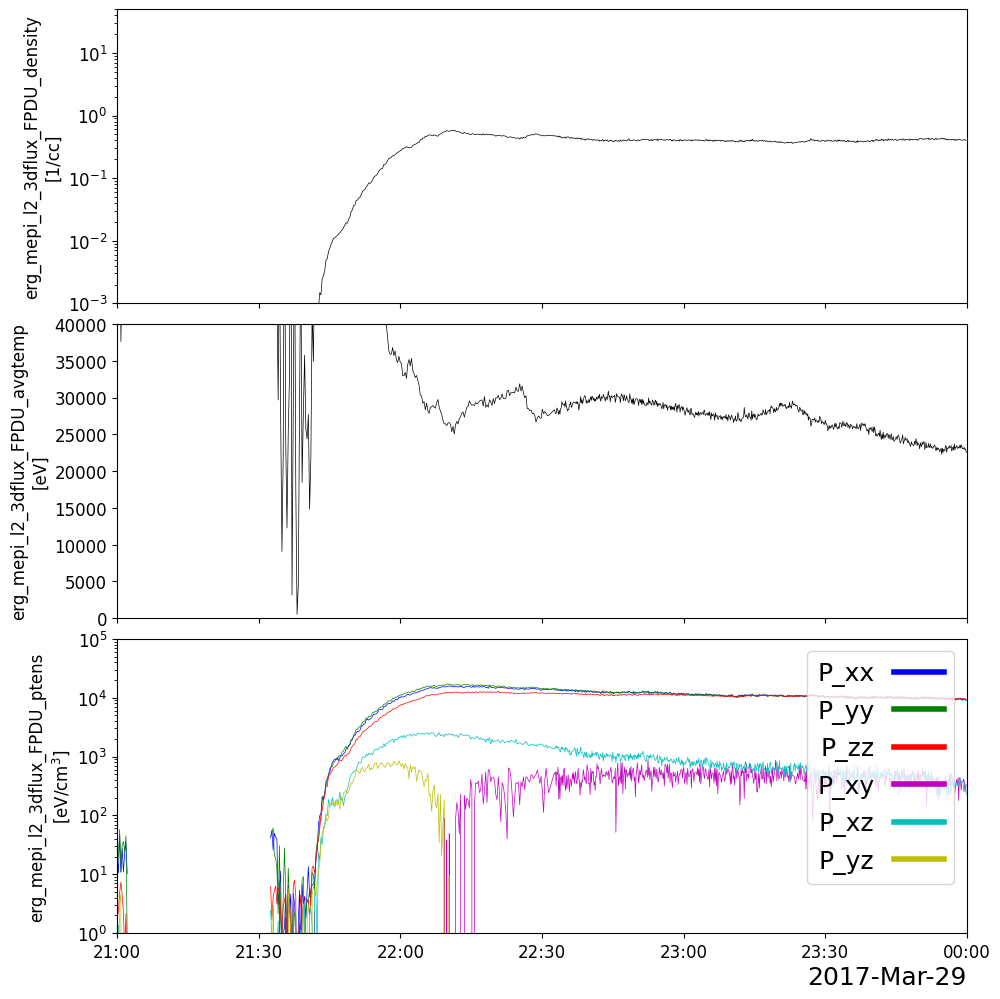

In [43]:
## Then plot the derived partial density, temperature, and pressure tensor for MEP-i protons.

import pytplot
pytplot.tplot(['erg_mepi_l2_3dflux_FPDU_density','erg_mepi_l2_3dflux_FPDU_avgtemp','erg_mepi_l2_3dflux_FPDU_ptens'], xsize = 10, ysize=12)

----
 # Beginner course
----
## 6. Load and plot OMNI data

This is an example to show how to load the OMNI data, which include the solar wind parameters as well as some frequently used geomagnetic indices, and to manipulate and plot the data.

In [ ]:
pyspedas.omni.data( trange=['2017-09-06', '2017-09-09'], time_clip=False )  ## Download and then load OMNI data for 2 days from September 7, 2017.

Set a time range for which plots are made using timespan(), and plot several tplot variables with tplot().

In [ ]:
pytplot.timespan( "2017-09-06 12:00:00", 2.5, keyword='days')    #Set time span from 2017-09-06 12:00:00 to 2017-09-09 00:00:00
tplot(['BX_GSE', 'BY_GSM', 'BZ_GSM', 'flow_speed', 'proton_density', 'Pressure','AU_INDEX', 'AL_INDEX','SYM_H',], xsize=10, ysize=20 )

he keywords xsize and ysize can be used to resize a plot. The default size is approximately (xsize, ysize) = (8, 9). The example right below thus produces a vertically-long plot.

In [ ]:
tplot( ['flow_speed', 'Pressure','SYM_H'], xsize=4, ysize=10 )

pytplot.options() module changes various attributes for a tplot variable. The example below changes the type of the vertical axis for the tplot variable Pressure to logarithmic. The resultant plot shows the dynamic pressure (bottom panel) with a log scale.

In [ ]:
pytplot.options('Pressure', 'ylog', True )
tplot( ['flow_speed', 'Pressure','SYM_H'], xsize=12, ysize=4 )  ## This pair of (xsize, ysize) would lead to a horizontally-long plot.

In [ ]:
pytplot.options('Pressure', 'ylog', False )

The following example changes the title of the tplot variable Pressure.
ytitle attribute holds a string that is to be shown by the vertical axis of a tplot variable. '\n' (backslash + n) is replaced with a newline.

In [ ]:
pytplot.options('Pressure', 'ytitle', 'Dynamic\npressure' )
tplot( ['flow_speed', 'Pressure','SYM_H'] , xsize=10, ysize=10 )

yrange attribute should be set to be a two-element array determining the range of a vertical axis.

timebar() can draw a vertical line at a designated date&time. Setting delete keyword to be True, the command erases the vertical lines previously drawn at the given date.

In [ ]:
pytplot.options( 'AL_INDEX', 'yrange', [-1000,0])
t_lines = pyspedas.time_double('2017-09-07 23:00:00')
pytplot.timebar( t_lines )
tplot(['Pressure','AL_INDEX','SYM_H'], xsize=10, ysize=10)

In [ ]:
pytplot.timebar( t_lines, delete=True )
tplot( ['Pressure','AL_INDEX','SYM_H'], xsize=10, ysize=10 )

##Create time-series plots of OMNI and Arase OFA spectra data.

In [ ]:
from pyspedas.erg import pwe_ofa
pwe_ofa( trange=['2017-09-06 00:00:00', '2017-09-09 00:00:00'] )
pytplot.timespan( '2017-09-06 12:00:00', 2.5)
pytplot.zlim( 'erg_pwe_ofa_l2_spec_E_spectra_132', 1e-7, 1e-2 )

pytplot.options(['erg_pwe_ofa_l2_spec_E_spectra_132','erg_pwe_ofa_l2_spec_B_spectra_132'], 'data_gap', 8.0)
pytplot.options(['erg_pwe_ofa_l2_spec_E_spectra_132','erg_pwe_ofa_l2_spec_B_spectra_132'], 'x_no_resample', 1)
pytplot.options(['erg_pwe_ofa_l2_spec_E_spectra_132','erg_pwe_ofa_l2_spec_B_spectra_132'], 'y_no_resample', 1)

tplot( ['Pressure', 'AL_INDEX','SYM_H', 'erg_pwe_ofa_l2_spec_E_spectra_132', 'erg_pwe_ofa_l2_spec_B_spectra_132'] , xsize=10, ysize=20)

----
 # Beginner and advanced courses
----

 ## 7. Let's reproduce Figure 3 by Kistler et al. (2023) with PySPEDAS

This paper has been recently press-released on October 30 for both domestic and international media. Kistler et al. (2023) showed that the plasma sheet source changes from predominantly solar wind to predominantly ionospheric as a storm develops. In this tranning, we try to reproduce Figure 3 by Kistler et al. (2023) with PySPEDAS.

#Load Arase particle data with PySPEDAS

In [ ]:
from pyspedas.erg import pwe_hfa, pwe_ofa, pwe_efd, mgf, xep, hep, mepe, lepe, mepi_nml, lepi, orb
trng = ['2017-09-06 00:00:00', '2017-09-09 00:00:00']
mepe( trange=trng, datatype='omniflux' )
lepe( trange=trng, datatype='omniflux' )
mepi_nml( trange=trng, datatype='omniflux' )
lepi( trange=trng, datatype='omniflux' )
orb(trange=trng, level = 'l2')
orb(trange=trng, level = 'l3', model ='t89')

In [ ]:
pytplot.split_vec('erg_orb_l3_pos_eq_t89')
pytplot.tplot_names()

In [ ]:
#Set time span (from 2017-09-06 12:00:00 to 2017-09-09 00:00:00)
pytplot.timespan( '2017-09-06 14:00:00', 2.417, keyword='days')

#No resample of X and Y components
pytplot.options(['erg_mepi_l2_omniflux_FPDO','erg_mepi_l2_omniflux_FODO','erg_lepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FODO'],'x_no_resample',1)
pytplot.options(['erg_mepi_l2_omniflux_FPDO','erg_mepi_l2_omniflux_FODO','erg_lepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FODO'],'y_no_resample',1)

#Set data gap.
#Parts of data gap of more than 64 sec are not plotted
pytplot.options(['erg_mepi_l2_omniflux_FPDO','erg_mepi_l2_omniflux_FODO','erg_lepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FODO'],'data_gap',64)

#Set yrange of each panel.
pytplot.options('F','yrange', [0.0, 40.0])
pytplot.options('BZ_GSM','yrange', [-40, 20.0])
pytplot.options('Pressure','yrange', [0.0, 15.0])
pytplot.options('proton_density','yrange', [0.1, 100.0])
pytplot.options('flow_speed','yrange', [0.0, 1000.0])
pytplot.options('SYM_H','yrange', [-150.0, 100.0])
pytplot.options('erg_mepi_l2_omniflux_FPDO','yrange', [10.0, 200.0])
pytplot.options('erg_mepi_l2_omniflux_FODO','yrange', [10.0, 200.0])
pytplot.options('erg_lepi_l2_omniflux_FPDO','yrange', [1.0, 25.0])
pytplot.options('erg_lepi_l2_omniflux_FODO','yrange', [1.0, 25.0])

#Set zrange of particle data.
pytplot.zlim('erg_mepi_l2_omniflux_FPDO', 10e0, 10e6)
pytplot.zlim('erg_mepi_l2_omniflux_FODO', 10e0, 10e6)
pytplot.zlim('erg_lepi_l2_omniflux_FPDO', 10e0, 10e6)
pytplot.zlim('erg_lepi_l2_omniflux_FODO', 10e0, 10e6)

#Change the tile of y-axis of each panel.
pytplot.options('F','ytitle', 'IMF\nBtot')
pytplot.options('BZ_GSM','ytitle', 'IMF\nBz\ngsm')
pytplot.options('Pressure','ytitle', 'SW\nflow\npressure')
pytplot.options('proton_density','ytitle', 'SW\nproton\ndensity')
pytplot.options('flow_speed','ytitle', 'SW\nflow\nspeed')
pytplot.options('SYM_H','ytitle', 'SYM\nH')
pytplot.options('erg_mepi_l2_omniflux_FPDO','ytitle', 'MEP-i\nH+')
pytplot.options('erg_mepi_l2_omniflux_FODO','ytitle', 'MEP-i\nO+')
pytplot.options('erg_lepi_l2_omniflux_FPDO','ytitle', 'LEP-i\nH+')
pytplot.options('erg_lepi_l2_omniflux_FODO','ytitle', 'LEP-i\nO+')
pytplot.options(['erg_orb_l3_pos_eq_t89_0'],'ytitle','Arase\nEquatorial\nCrossing\nT89')
pytplot.options(['erg_orb_l3_pos_eq_t89_0'],'ysubtitle','[Re]')

#Plot the data.
tplot(['F','BZ_GSM','Pressure','proton_density','flow_speed','SYM_H','erg_mepi_l2_omniflux_FPDO','erg_lepi_l2_omniflux_FPDO','erg_mepi_l2_omniflux_FODO','erg_lepi_l2_omniflux_FODO', 'erg_orb_l3_pos_eq_t89_0'],xsize = 10, ysize = 30)